In [1]:
from scipy.integrate import solve_ivp
from matplotlib.pyplot import subplots
from numpy import linspace, around, var, ndarray
from scipy.signal import find_peaks

In [2]:
def plot_bifdiagram(results_min_f, results_max_f, 
                    par_set):
    
    N = len(results_min_f)

    fig, ax = subplots(figsize=(6, 4))

    for xe, ye in zip(par_set, results_max_f[0]):

        if not isinstance(ye, ndarray):
            ax.scatter(xe, ye, c='k', s=6, marker='D')
        else:
            ax.scatter([xe] * len(ye), ye, s=3, c='r', marker='D')

    for xe, ye in zip(par_set, results_min_f[0]):

        if not isinstance(ye, ndarray):
            ax.scatter(xe, ye, c='gray', s=6, marker='d')
        else:
            ax.scatter([xe] * len(ye), ye, s=3, c='b', marker='d')


    ax.set_xticks(linspace(par_set[0], par_set[-1], 5));
    ax.set_xticklabels(around(linspace(par_set[0], par_set[-1], 5), 2), fontsize=16);
    ax.set_xlabel('Parameter', fontsize=16)

    ax.set_ylabel('EX', fontsize=14)

    y_min, y_max = ax.get_ylim()

    ax.set_yticks(linspace(y_min, y_max, 3));
    ax.set_yticklabels(around(linspace(y_min, y_max, 3),2), fontsize=14);

    fig.tight_layout()
    
    return fig, ax

# Model of Feedforward inhibition combined with feedback inhibition


In [ ]:
def model(t, variables, a1, b1, a2, b2, k_max, K_m, n, m):
    """Coupled system with forward inhibition"""
    S, P = variables
    
    enzymatic_rate = (k_max * S**n) / (K_m**m + S**m)
    
    dSdt = a1 - b1 * S - enzymatic_rate
    dPdt = a2 - b2 * P + enzymatic_rate
    
    return [dSdt, dPdt]


b1, b2  = 0.1, 0.01
a1  = [0.4, 0.6]
a2  = 0.01
k_max, K_m = 2, 1
n, m    = 1, 3


S_0 = 2.5
P_0 = 0.6 

y0 = [S_0, P_0]

t_span = (0, 800)

## Time Series

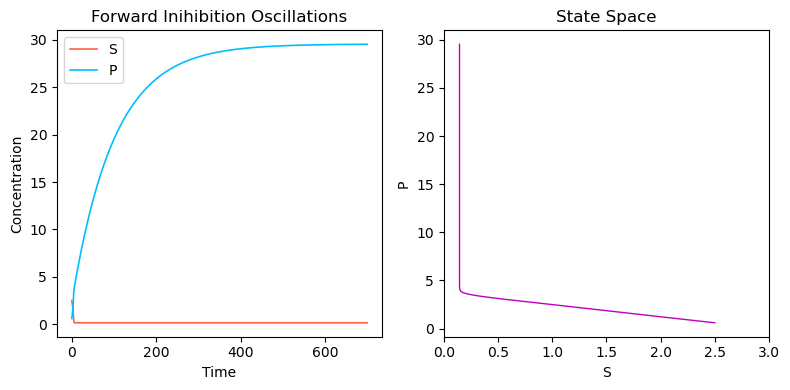

In [3]:
def model(t, variables, a1, b1, a2, b2, k_max, K_m, n, m):
    """Coupled system with forward inhibition"""
    S, P = variables
    
    enzymatic_rate = (k_max * S**n) / (K_m**m + S**m)
    
    dSdt = a1 - b1 * S - enzymatic_rate
    dPdt = a2 - b2 * P + enzymatic_rate
    
    return [dSdt, dPdt]


b1, b2  = 0.1, 0.01
a1  = 0.3
a2  = 0.01
k_max, K_m = 2, 1
n, m    = 1, 3


S_0 = 2.5
P_0 = 0.6 

y0 = [S_0, P_0]

t_span = (0, 700)

solution = solve_ivp(model, t_span, y0, args=(a1, b1, a2, b2, k_max, K_m, n, m), method='BDF', max_step=0.1)

t = solution.t

S = solution.y[0]
P = solution.y[1]

fig, ax = subplots(ncols=2, figsize=(8, 4))

ax[0].plot(t, S, label='S', linewidth=1.2, color='tomato')
ax[0].plot(t, P, label='P', linewidth=1.2, color='deepskyblue')

ax[0].set_xlabel('Time')
ax[0].set_ylabel('Concentration')
ax[0].legend()
ax[0].set_title('Forward Inihibition Oscillations')

ax[1].plot(S, P, linewidth=1, color='m');
# ax[1].plot(c2[:300], c3[:300], linewidth=1, color='k');
ax[1].set_xlabel('S')
ax[1].set_ylabel('P')
ax[1].set_title('State Space')
ax[1].set_xlim(0, 3)
# ax[1].set_ylim(4, 14)


fig.tight_layout()

In [4]:
around((S[-1], P[-1]), 2)


array([ 0.14, 29.54])

## Bifurcation Diagram

In [12]:
def model(t, variables, a1, b1, a2, b2, k_max, K_m, n, m):
    """Coupled system with forward inhibition"""
    S, P = variables
    
    enzymatic_rate = (k_max * S**n) / (K_m**m + S**m)
    
    dSdt = a1 - b1 * S - enzymatic_rate
    dPdt = a2 - b2 * P + enzymatic_rate
    
    return [dSdt, dPdt]


b1, b2  = 0.1, 0.01
a1  = 0.3
a2  = 0.01
k_max, K_m = 2, 1
n, m    = 1, 3


S_0 = 2.5
P_0 = 0.6 

y0 = [S_0, P_0]

t_span = (0, 700)


# Bifurcation parameter set
par_min, par_max, steps = 0.1, 2, 30
# par_min, par_max, steps = 2, 0.1, 30

par_set = linspace(par_min, par_max, steps)

# Time array
t_span = (0, 500)

results_min_f      = dict()
results_min_inds_f = dict()
results_max_f      = dict()
results_max_inds_f = dict()

# Simulation "forward"
for par in par_set:

    solution = solve_ivp(model, t_span, y0, args=(par, b1, a2, b2, k_max, K_m, n, m), method='BDF', max_step=0.1)

    S = solution.y[0]
    P = solution.y[1]

    rows = S.size//2

    series = S[rows//2:]

    num = 0
                
    if var(series) < 0.001:

        if num not in results_min_f:
            
            results_min_f[num]      = [series[-1]]
            results_min_inds_f[num] = [0]    
           
        else:
            results_min_f[num].append(series[-1])
            results_min_inds_f[num].append(0)    

        if num not in results_max_f:
            
            results_max_f[num]      = [series[-1]]
            results_max_inds_f[num] = [0]    
           
        else:
            results_max_f[num].append(series[-1])
            results_max_inds_f[num].append(0)    

    else:
        
        y_f_max_inds = find_peaks(series, distance=100)
        y_f_maxs     = series[y_f_max_inds[0]]

        y_f_min_inds = find_peaks(-series, distance=100)
        y_f_mins     = series[y_f_min_inds[0]]

        if num not in results_min_f:

            results_min_f[num]      = [y_f_mins]
            results_min_inds_f[num] = [y_f_min_inds]
            
            results_max_f[num]      = [y_f_maxs]
            results_max_inds_f[num] = [y_f_max_inds]

        else:

            results_min_f[num].append(y_f_mins)
            results_min_inds_f[num].append(y_f_min_inds)
            
            results_max_f[num].append(y_f_maxs)
            results_max_inds_f[num].append(y_f_max_inds)


    if par != par_set[-1]:
        
        y0 = solution.y[:, -1]

print('')
print('Scan complete!', list(around(solution.y[:, -1],3)))
print('')


Scan complete! [np.float64(19.95), np.float64(1.503)]



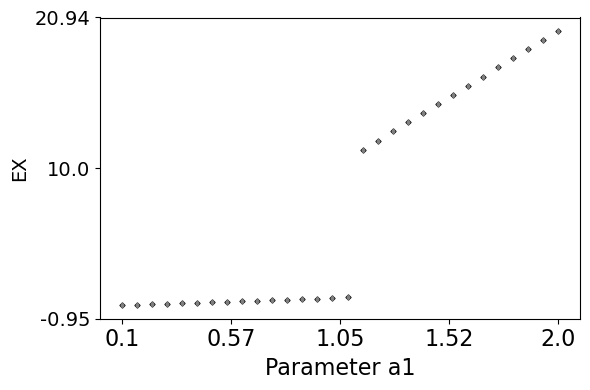

In [13]:
fig, ax = plot_bifdiagram(results_min_f, results_max_f, par_set)

ax.set_xlabel('Parameter a1', fontsize=16);

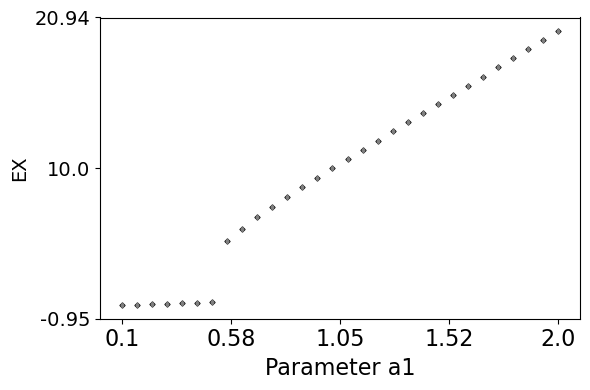

In [11]:
fig, ax = plot_bifdiagram(results_min_f, results_max_f, par_set)
    
ax.set_xlabel('Parameter a1', fontsize=16);

# Claude

POTENTIAL LANDSCAPE ANALYSIS

For a1=0.4:
Found 1 steady state(s):
  State 1: S=0.1918, P=39.0825


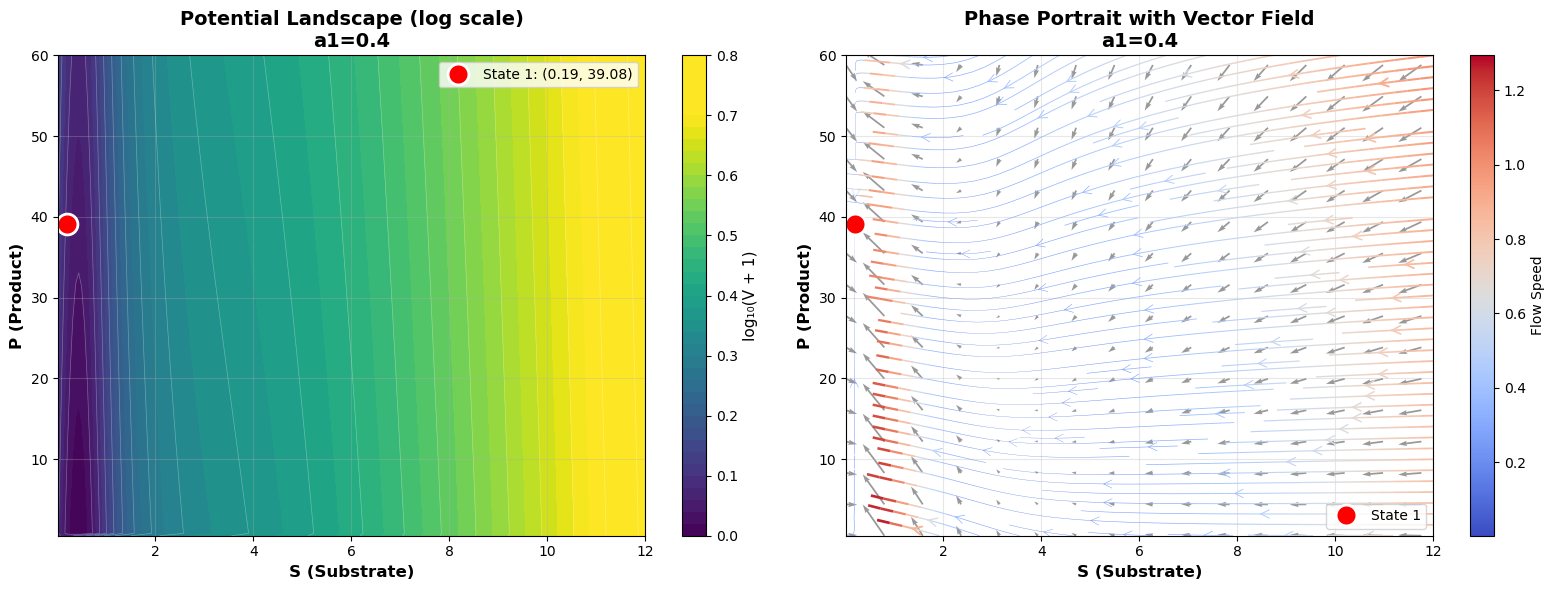


For a1=0.6:
Found 3 steady state(s):
  State 1: S=0.2925, P=58.0748
  State 2: S=2.1888, P=39.1121
  State 3: S=5.2901, P=8.0986


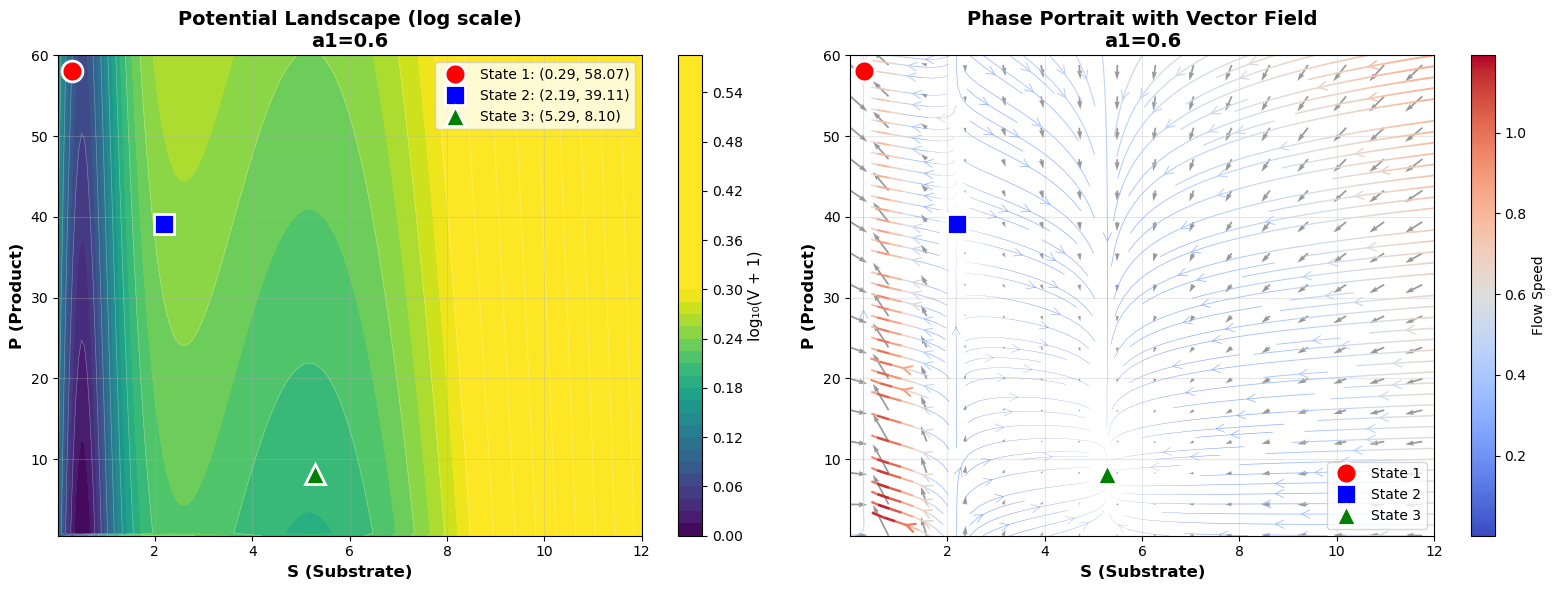

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, odeint
from scipy.optimize import fsolve
import seaborn as sns

def model(t, variables, a1, b1, a2, b2, k_max, K_m, n, m):
    """Coupled system with forward inhibition"""
    S, P = variables
    
    enzymatic_rate = (k_max * S**n) / (K_m**m + S**m)
    
    dSdt = a1 - b1 * S - enzymatic_rate
    dPdt = a2 - b2 * P + enzymatic_rate
    
    return [dSdt, dPdt]

def model_array(variables, a1, b1, a2, b2, k_max, K_m, n, m):
    """Model function for array inputs"""
    S, P = variables
    enzymatic_rate = (k_max * S**n) / (K_m**m + S**m)
    dSdt = a1 - b1 * S - enzymatic_rate
    dPdt = a2 - b2 * P + enzymatic_rate
    return np.array([dSdt, dPdt])

def find_steady_states(a1, b1, a2, b2, k_max, K_m, n, m, num_guesses=20):
    """Find all steady states by trying multiple initial guesses"""
    def steady_state_eq(variables):
        return model_array(variables, a1, b1, a2, b2, k_max, K_m, n, m)
    
    steady_states = []
    
    # Generate initial guesses on a grid
    S_guesses = np.linspace(0.1, 10, num_guesses)
    P_guesses = np.linspace(0.1, 10, num_guesses)
    
    for S_guess in S_guesses:
        for P_guess in P_guesses:
            try:
                sol = fsolve(steady_state_eq, [S_guess, P_guess], full_output=True)
                if sol[2] == 1:  # Solution converged
                    state = sol[0]
                    # Check if positive and actually a steady state
                    if state[0] > 0 and state[1] > 0:
                        residual = np.linalg.norm(steady_state_eq(state))
                        if residual < 1e-6:
                            # Check if we already found this state
                            is_new = True
                            for existing in steady_states:
                                if np.linalg.norm(state - existing) < 1e-3:
                                    is_new = False
                                    break
                            if is_new:
                                steady_states.append(state)
            except:
                pass
    
    return np.array(steady_states)

def compute_potential_landscape(a1, b1, a2, b2, k_max, K_m, n, m, 
                                S_range, P_range, resolution=100):
    """
    Compute quasi-potential landscape using path integral method.
    The potential is constructed such that -grad(V) approximates the flow.
    """
    S_grid = np.linspace(S_range[0], S_range[1], resolution)
    P_grid = np.linspace(P_range[0], P_range[1], resolution)
    S_mesh, P_mesh = np.meshgrid(S_grid, P_grid)
    
    # Compute vector field
    dS = np.zeros_like(S_mesh)
    dP = np.zeros_like(P_mesh)
    
    for i in range(resolution):
        for j in range(resolution):
            derivatives = model_array([S_mesh[i,j], P_mesh[i,j]], 
                                     a1, b1, a2, b2, k_max, K_m, n, m)
            dS[i,j] = derivatives[0]
            dP[i,j] = derivatives[1]
    
    # Method 1: Integrate potential from vector field
    # V is constructed such that the system flows "downhill"
    # We use: V(x) = -∫ F·dx where F is the vector field
    
    potential = np.zeros_like(S_mesh)
    
    # Start from center and integrate outward
    center_i, center_j = resolution // 2, resolution // 2
    
    # Use a simple path integral approach
    # Integrate along each row first, then adjust columns
    for i in range(resolution):
        for j in range(1, resolution):
            # Integrate along S direction
            dS_step = S_grid[j] - S_grid[j-1]
            avg_field_S = -(dS[i,j] + dS[i,j-1]) / 2
            potential[i,j] = potential[i,j-1] + avg_field_S * dS_step
    
    # Add column integration
    for j in range(resolution):
        for i in range(1, resolution):
            dP_step = P_grid[i] - P_grid[i-1]
            avg_field_P = -(dP[i,j] + dP[i-1,j]) / 2
            potential[i,j] += avg_field_P * dP_step
    
    # Normalize potential (shift minimum to zero)
    potential = potential - np.min(potential)
    
    return S_mesh, P_mesh, potential, dS, dP

def plot_potential_landscape(a1_value, b1, a2, b2, k_max, K_m, n, m,
                            S_range=(0.5, 12), P_range=(0.5, 50), resolution=200):
    """Create comprehensive visualization of potential landscape"""
    
    # Find steady states
    steady_states = find_steady_states(a1_value, b1, a2, b2, k_max, K_m, n, m)
    print(f"\nFor a1={a1_value}:")
    print(f"Found {len(steady_states)} steady state(s):")
    for i, state in enumerate(steady_states):
        print(f"  State {i+1}: S={state[0]:.4f}, P={state[1]:.4f}")
    
    # Compute potential landscape
    S_mesh, P_mesh, potential, dS, dP = compute_potential_landscape(
        a1_value, b1, a2, b2, k_max, K_m, n, m, S_range, P_range, resolution
    )
    
    # Create figure
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot 1: Potential heatmap with steady states
    ax1 = axes[0]
    
    # Use log scale for better visualization if potential range is large
    potential_plot = np.log10(potential + 1)  # log scale for better contrast

    if a1_value == 0.4:
    
        im = ax1.contourf(S_mesh, P_mesh, potential_plot, levels=50, cmap='viridis', vmin=0, vmax=0.7)
        contours = ax1.contour(S_mesh, P_mesh, potential_plot, levels=20, 
                               colors='white', alpha=0.3, linewidths=0.5)

    elif a1_value == 0.6:
    
        im = ax1.contourf(S_mesh, P_mesh, potential_plot, levels=50, cmap='viridis', vmin=0, vmax=0.3)
        contours = ax1.contour(S_mesh, P_mesh, potential_plot, levels=20, 
                               colors='white', alpha=0.3, linewidths=0.5)
        
    # Mark steady states
    colors = ['red', 'blue', 'green', 'orange', 'purple']
    markers = ['o', 's', '^', 'd', 'v']
    
    for i, state in enumerate(steady_states):
        ax1.plot(state[0], state[1], markers[i % len(markers)], 
                color=colors[i % len(colors)], markersize=15, 
                markeredgecolor='white', markeredgewidth=2,
                label=f'State {i+1}: ({state[0]:.2f}, {state[1]:.2f})')
    
    ax1.set_xlabel('S (Substrate)', fontsize=12, fontweight='bold')
    ax1.set_ylabel('P (Product)', fontsize=12, fontweight='bold')
    ax1.set_title(f'Potential Landscape (log scale)\na1={a1_value}', 
                  fontsize=14, fontweight='bold')
    ax1.legend(loc='best', fontsize=10)
    ax1.grid(True, alpha=0.3)
    
    cbar = plt.colorbar(im, ax=ax1)
    cbar.set_label('log₁₀(V + 1)', fontsize=11)
    
    # Plot 2: Phase portrait with vector field
    ax2 = axes[1]
    
    # Streamplot
    speed = np.sqrt(dS**2 + dP**2)
    lw = 2 * speed / speed.max()  # Line width proportional to speed
    
    strm = ax2.streamplot(S_mesh, P_mesh, dS, dP, color=speed, 
                         linewidth=lw, cmap='coolwarm', density=1.5,
                         arrowsize=1.5, arrowstyle='->')
    
    # Add quiver for clearer direction
    skip = resolution // 15
    ax2.quiver(S_mesh[::skip, ::skip], P_mesh[::skip, ::skip], 
              dS[::skip, ::skip], dP[::skip, ::skip],
              alpha=0.4, scale=20, width=0.003)
    
    # Mark steady states
    for i, state in enumerate(steady_states):
        ax2.plot(state[0], state[1], markers[i % len(markers)], 
                color=colors[i % len(colors)], markersize=15,
                markeredgecolor='white', markeredgewidth=2,
                label=f'State {i+1}')
    
    ax2.set_xlabel('S (Substrate)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('P (Product)', fontsize=12, fontweight='bold')
    ax2.set_title(f'Phase Portrait with Vector Field\na1={a1_value}', 
                  fontsize=14, fontweight='bold')
    ax2.legend(loc='best', fontsize=10)
    ax2.grid(True, alpha=0.3)
    
    plt.colorbar(strm.lines, ax=ax2, label='Flow Speed')
    
    plt.tight_layout()
    plt.savefig(f'potential_landscape_a1_{a1_value}.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return steady_states, S_mesh, P_mesh, potential

# Parameters
b1, b2 = 0.1, 0.01
a2 = 0.01
k_max, K_m = 2, 1
n, m = 1, 3

# Analyze both cases
print("="*60)
print("POTENTIAL LANDSCAPE ANALYSIS")
print("="*60)

for a1_val in [0.4, 0.6]:
    steady_states, S_mesh, P_mesh, potential = plot_potential_landscape(
        a1_val, b1, a2, b2, k_max, K_m, n, m,
        S_range=(0.01, 12), P_range=(0.5, 60), resolution=200
    )

CORRECTED POTENTIAL LANDSCAPE ANALYSIS

For a1=0.4:
Found 1 steady state(s):
  State 1: S=0.1918, P=39.0825 [STABLE]
    Eigenvalues: [-0.01       -2.04428259]


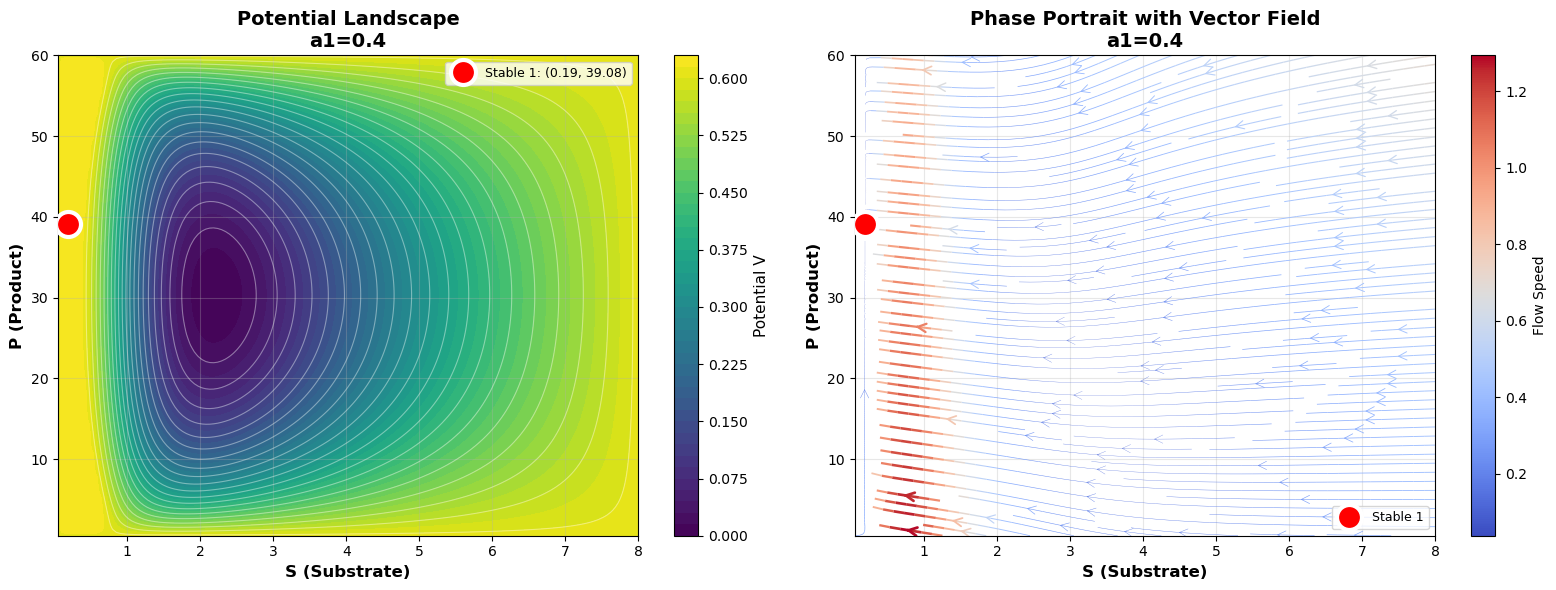


For a1=0.6:
Found 3 steady state(s):
  State 1: S=0.2925, P=58.0748 [STABLE]
    Eigenvalues: [-0.01       -1.90823058]
  State 2: S=2.1888, P=39.1121 [UNSTABLE]
    Eigenvalues: [-0.01        0.20276919]
  State 3: S=5.2901, P=8.0986 [STABLE]
    Eigenvalues: [-0.01       -0.07343305]


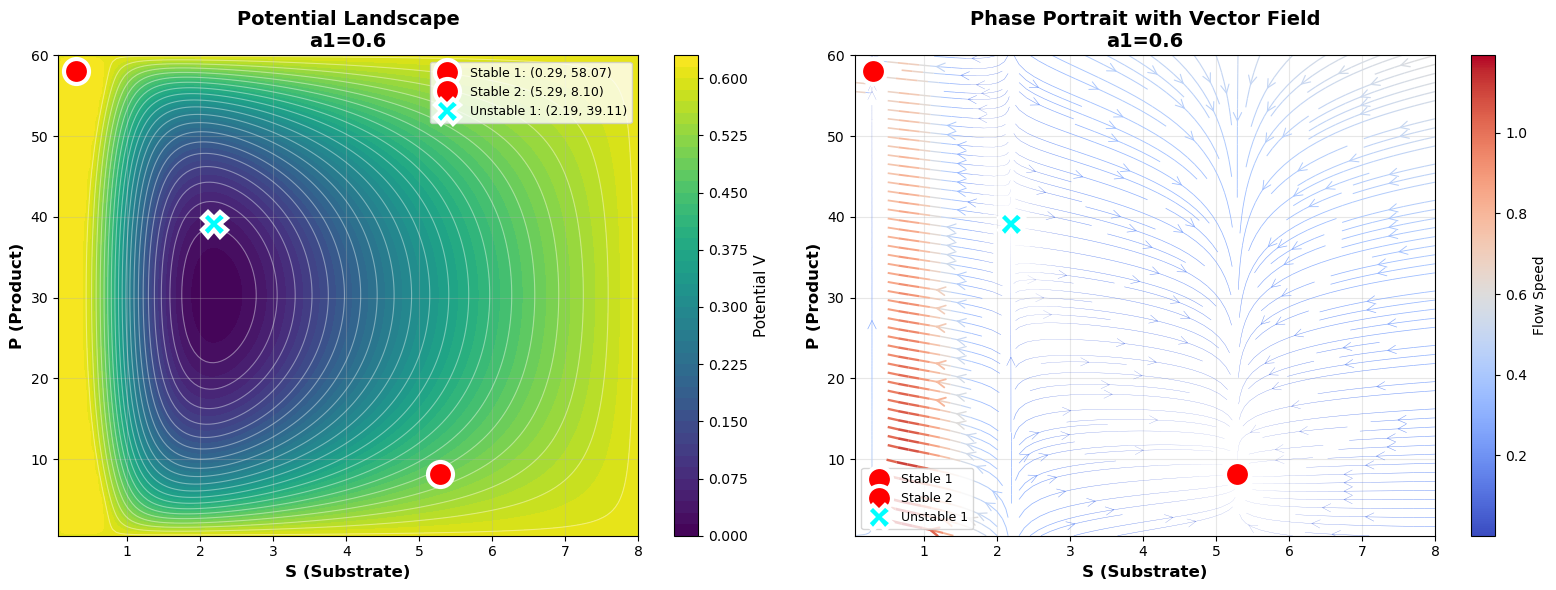

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve, minimize
from scipy.ndimage import gaussian_filter

def model(t, variables, a1, b1, a2, b2, k_max, K_m, n, m):
    """Coupled system with forward inhibition"""
    S, P = variables
    
    enzymatic_rate = (k_max * S**n) / (K_m**m + S**m)
    
    dSdt = a1 - b1 * S - enzymatic_rate
    dPdt = a2 - b2 * P + enzymatic_rate
    
    return [dSdt, dPdt]

def model_array(variables, a1, b1, a2, b2, k_max, K_m, n, m):
    """Model function for array inputs"""
    S, P = variables
    enzymatic_rate = (k_max * S**n) / (K_m**m + S**m)
    dSdt = a1 - b1 * S - enzymatic_rate
    dPdt = a2 - b2 * P + enzymatic_rate
    return np.array([dSdt, dPdt])

def find_steady_states(a1, b1, a2, b2, k_max, K_m, n, m, num_guesses=20):
    """Find all steady states by trying multiple initial guesses"""
    def steady_state_eq(variables):
        return model_array(variables, a1, b1, a2, b2, k_max, K_m, n, m)
    
    steady_states = []
    
    # Generate initial guesses on a grid
    S_guesses = np.linspace(0.1, 10, num_guesses)
    P_guesses = np.linspace(0.1, 10, num_guesses)
    
    for S_guess in S_guesses:
        for P_guess in P_guesses:
            try:
                sol = fsolve(steady_state_eq, [S_guess, P_guess], full_output=True)
                if sol[2] == 1:  # Solution converged
                    state = sol[0]
                    # Check if positive and actually a steady state
                    if state[0] > 0 and state[1] > 0:
                        residual = np.linalg.norm(steady_state_eq(state))
                        if residual < 1e-6:
                            # Check if we already found this state
                            is_new = True
                            for existing in steady_states:
                                if np.linalg.norm(state - existing) < 1e-3:
                                    is_new = False
                                    break
                            if is_new:
                                steady_states.append(state)
            except:
                pass
    
    return np.array(steady_states)

def check_stability(state, a1, b1, a2, b2, k_max, K_m, n, m, epsilon=1e-6):
    """Check stability of a steady state using Jacobian eigenvalues"""
    S, P = state
    
    # Compute Jacobian numerically
    J = np.zeros((2, 2))
    
    # df1/dS
    f_plus = model_array([S + epsilon, P], a1, b1, a2, b2, k_max, K_m, n, m)[0]
    f_minus = model_array([S - epsilon, P], a1, b1, a2, b2, k_max, K_m, n, m)[0]
    J[0, 0] = (f_plus - f_minus) / (2 * epsilon)
    
    # df1/dP
    f_plus = model_array([S, P + epsilon], a1, b1, a2, b2, k_max, K_m, n, m)[0]
    f_minus = model_array([S, P - epsilon], a1, b1, a2, b2, k_max, K_m, n, m)[0]
    J[0, 1] = (f_plus - f_minus) / (2 * epsilon)
    
    # df2/dS
    f_plus = model_array([S + epsilon, P], a1, b1, a2, b2, k_max, K_m, n, m)[1]
    f_minus = model_array([S - epsilon, P], a1, b1, a2, b2, k_max, K_m, n, m)[1]
    J[1, 0] = (f_plus - f_minus) / (2 * epsilon)
    
    # df2/dP
    f_plus = model_array([S, P + epsilon], a1, b1, a2, b2, k_max, K_m, n, m)[1]
    f_minus = model_array([S, P - epsilon], a1, b1, a2, b2, k_max, K_m, n, m)[1]
    J[1, 1] = (f_plus - f_minus) / (2 * epsilon)
    
    # Eigenvalues
    eigenvalues = np.linalg.eigvals(J)
    
    # Stable if all real parts are negative
    is_stable = np.all(np.real(eigenvalues) < 0)
    
    return is_stable, eigenvalues

def compute_potential_from_trajectories(a1, b1, a2, b2, k_max, K_m, n, m, 
                                       steady_states, S_range, P_range, 
                                       resolution=100):
    """
    Compute potential by integrating trajectories backward in time.
    Points that flow to the same attractor have similar potential values.
    """
    S_grid = np.linspace(S_range[0], S_range[1], resolution)
    P_grid = np.linspace(P_range[0], P_range[1], resolution)
    S_mesh, P_mesh = np.meshgrid(S_grid, P_grid)
    
    potential = np.zeros_like(S_mesh)
    
    # Identify stable steady states
    stable_states = []
    for state in steady_states:
        is_stable, _ = check_stability(state, a1, b1, a2, b2, k_max, K_m, n, m)
        if is_stable:
            stable_states.append(state)
    
    print(f"  Found {len(stable_states)} stable attractor(s)")
    
    # For each grid point, integrate forward to see which attractor it reaches
    # and compute "energy" based on trajectory length
    for i in range(resolution):
        for j in range(resolution):
            S0, P0 = S_mesh[i, j], P_mesh[i, j]
            
            # Integrate forward in time
            t_span = (0, 500)
            sol = solve_ivp(
                lambda t, y: model(t, y, a1, b1, a2, b2, k_max, K_m, n, m),
                t_span, [S0, P0], 
                method='LSODA', dense_output=True, rtol=1e-6, atol=1e-9
            )
            
            if sol.success:
                # Final state
                S_final, P_final = sol.y[0, -1], sol.y[1, -1]
                
                # Compute "action" - integral of squared velocity along trajectory
                times = np.linspace(0, sol.t[-1], 200)
                states = sol.sol(times)
                
                # Compute velocity at each point
                velocities = np.array([
                    model(t, states[:, k], a1, b1, a2, b2, k_max, K_m, n, m)
                    for k, t in enumerate(times)
                ])
                
                # Action integral: ∫ |v|² dt
                speeds_squared = np.sum(velocities**2, axis=1)
                action = np.trapz(speeds_squared, times)
                
                potential[i, j] = action
    
    # Smooth the potential slightly to remove numerical artifacts
    potential = gaussian_filter(potential, sigma=1.0)
    
    # Shift minimum to zero
    potential = potential - np.min(potential)
    
    return S_mesh, P_mesh, potential, stable_states

def compute_potential_variational(a1, b1, a2, b2, k_max, K_m, n, m,
                                 S_range, P_range, resolution=100):
    """
    Compute potential using a variational approach.
    We minimize: ∫∫ |F + ∇V|² dS dP
    where F is the vector field and V is the potential.
    
    This approach constructs V such that F ≈ -∇V
    """
    S_grid = np.linspace(S_range[0], S_range[1], resolution)
    P_grid = np.linspace(P_range[0], P_range[1], resolution)
    S_mesh, P_mesh = np.meshgrid(S_grid, P_grid)
    
    dS = S_grid[1] - S_grid[0]
    dP = P_grid[1] - P_grid[0]
    
    # Compute vector field
    F_S = np.zeros_like(S_mesh)
    F_P = np.zeros_like(P_mesh)
    
    for i in range(resolution):
        for j in range(resolution):
            derivatives = model_array([S_mesh[i,j], P_mesh[i,j]], 
                                     a1, b1, a2, b2, k_max, K_m, n, m)
            F_S[i,j] = derivatives[0]
            F_P[i,j] = derivatives[1]
    
    # Solve Poisson equation: ∇²V = -∇·F
    # This ensures that -∇V ≈ F
    
    # Compute divergence of F
    div_F = np.zeros_like(S_mesh)
    
    for i in range(1, resolution-1):
        for j in range(1, resolution-1):
            dFSdS = (F_S[i+1, j] - F_S[i-1, j]) / (2 * dS)
            dFPdP = (F_P[i, j+1] - F_P[i, j-1]) / (2 * dP)
            div_F[i, j] = dFSdS + dFPdP
    
    # Solve Poisson equation using iterative method (Gauss-Seidel)
    V = np.zeros_like(S_mesh)
    
    # Iterative solver for ∇²V = -div_F
    max_iterations = 5000
    tolerance = 1e-6
    
    for iteration in range(max_iterations):
        V_old = V.copy()
        
        for i in range(1, resolution-1):
            for j in range(1, resolution-1):
                # Discrete Laplacian
                V[i, j] = 0.25 * (
                    V[i+1, j] + V[i-1, j] + V[i, j+1] + V[i, j-1]
                    + (dS * dP) * div_F[i, j]
                )
        
        # Check convergence
        if np.max(np.abs(V - V_old)) < tolerance:
            print(f"  Converged after {iteration+1} iterations")
            break
    
    # Normalize
    V = V - np.min(V)
    
    return S_mesh, P_mesh, V

def plot_potential_landscape(a1_value, b1, a2, b2, k_max, K_m, n, m,
                            S_range=(0.05, 8), P_range=(0.5, 60), 
                            resolution=150, method='variational'):
    """Create comprehensive visualization of potential landscape"""
    
    # Find steady states
    steady_states = find_steady_states(a1_value, b1, a2, b2, k_max, K_m, n, m)
    print(f"\nFor a1={a1_value}:")
    print(f"Found {len(steady_states)} steady state(s):")
    
    stable_states = []
    unstable_states = []
    
    for i, state in enumerate(steady_states):
        is_stable, eigenvalues = check_stability(state, a1_value, b1, a2, b2, 
                                                 k_max, K_m, n, m)
        stability = "STABLE" if is_stable else "UNSTABLE"
        print(f"  State {i+1}: S={state[0]:.4f}, P={state[1]:.4f} [{stability}]")
        print(f"    Eigenvalues: {eigenvalues}")
        
        if is_stable:
            stable_states.append(state)
        else:
            unstable_states.append(state)
    
    # Compute potential landscape
    if method == 'variational':
        S_mesh, P_mesh, potential = compute_potential_variational(
            a1_value, b1, a2, b2, k_max, K_m, n, m, 
            S_range, P_range, resolution
        )
    else:  # trajectory method
        S_mesh, P_mesh, potential, _ = compute_potential_from_trajectories(
            a1_value, b1, a2, b2, k_max, K_m, n, m, 
            steady_states, S_range, P_range, resolution
        )
    
    # Compute vector field for phase portrait
    dS = np.zeros_like(S_mesh)
    dP = np.zeros_like(P_mesh)
    
    for i in range(resolution):
        for j in range(resolution):
            derivatives = model_array([S_mesh[i,j], P_mesh[i,j]], 
                                     a1_value, b1, a2, b2, k_max, K_m, n, m)
            dS[i,j] = derivatives[0]
            dP[i,j] = derivatives[1]
    
    # Create figure
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot 1: Potential heatmap with steady states
    ax1 = axes[0]
    
    # Use adaptive scaling for better visualization
    potential_plot = potential.copy()
    vmax = np.percentile(potential_plot, 95)  # Cap at 95th percentile
    potential_plot = np.clip(potential_plot, 0, vmax)
    
    im = ax1.contourf(S_mesh, P_mesh, potential_plot, levels=50, cmap='viridis')
    contours = ax1.contour(S_mesh, P_mesh, potential_plot, levels=20, 
                           colors='white', alpha=0.4, linewidths=0.8)
    
    # Mark stable steady states
    for i, state in enumerate(stable_states):
        ax1.plot(state[0], state[1], 'o', 
                color='red', markersize=18, 
                markeredgecolor='white', markeredgewidth=3,
                label=f'Stable {i+1}: ({state[0]:.2f}, {state[1]:.2f})',
                zorder=10)
    
    # Mark unstable steady states
    for i, state in enumerate(unstable_states):
        ax1.plot(state[0], state[1], 'X', 
                color='cyan', markersize=18, 
                markeredgecolor='white', markeredgewidth=3,
                label=f'Unstable {i+1}: ({state[0]:.2f}, {state[1]:.2f})',
                zorder=10)
    
    ax1.set_xlabel('S (Substrate)', fontsize=12, fontweight='bold')
    ax1.set_ylabel('P (Product)', fontsize=12, fontweight='bold')
    ax1.set_title(f'Potential Landscape\na1={a1_value}', 
                  fontsize=14, fontweight='bold')
    ax1.legend(loc='best', fontsize=9)
    ax1.grid(True, alpha=0.3)
    
    cbar = plt.colorbar(im, ax=ax1)
    cbar.set_label('Potential V', fontsize=11)
    
    # Plot 2: Phase portrait with vector field
    ax2 = axes[1]
    
    # Streamplot
    speed = np.sqrt(dS**2 + dP**2)
    lw = 2 * speed / speed.max()
    
    strm = ax2.streamplot(S_mesh, P_mesh, dS, dP, color=speed, 
                         linewidth=lw, cmap='coolwarm', density=1.8,
                         arrowsize=1.5, arrowstyle='->')
    
    # Mark stable steady states
    for i, state in enumerate(stable_states):
        ax2.plot(state[0], state[1], 'o', 
                color='red', markersize=18,
                markeredgecolor='white', markeredgewidth=3,
                label=f'Stable {i+1}', zorder=10)
    
    # Mark unstable steady states
    for i, state in enumerate(unstable_states):
        ax2.plot(state[0], state[1], 'X', 
                color='cyan', markersize=18,
                markeredgecolor='white', markeredgewidth=3,
                label=f'Unstable {i+1}', zorder=10)
    
    ax2.set_xlabel('S (Substrate)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('P (Product)', fontsize=12, fontweight='bold')
    ax2.set_title(f'Phase Portrait with Vector Field\na1={a1_value}', 
                  fontsize=14, fontweight='bold')
    ax2.legend(loc='best', fontsize=9)
    ax2.grid(True, alpha=0.3)
    
    plt.colorbar(strm.lines, ax=ax2, label='Flow Speed')
    
    plt.tight_layout()
    plt.savefig(f'potential_landscape_a1_{a1_value}_corrected.png', 
                dpi=300, bbox_inches='tight')
    plt.show()
    
    return steady_states, S_mesh, P_mesh, potential

# Parameters
b1, b2 = 0.1, 0.01
a2 = 0.01
k_max, K_m = 2, 1
n, m = 1, 3

# Analyze both cases
print("="*60)
print("CORRECTED POTENTIAL LANDSCAPE ANALYSIS")
print("="*60)

for a1_val in [0.4, 0.6]:
    steady_states, S_mesh, P_mesh, potential = plot_potential_landscape(
        a1_val, b1, a2, b2, k_max, K_m, n, m,
        S_range=(0.05, 8), P_range=(0.5, 60), 
        resolution=150,
        method='variational'  # Use 'trajectory' for alternative method
    )

# Single Variable Case

1D POTENTIAL LANDSCAPE ANALYSIS

a1 = 0.4
Found 1 steady state(s):
  S* = 0.191755  [STABLE]  (df/dS = -2.044283)

a1 = 0.6
Found 3 steady state(s):
  S* = 0.292517  [STABLE]  (df/dS = -1.908231)
  S* = 2.188791  [UNSTABLE]  (df/dS = 0.202769)
  S* = 5.290141  [STABLE]  (df/dS = -0.073433)


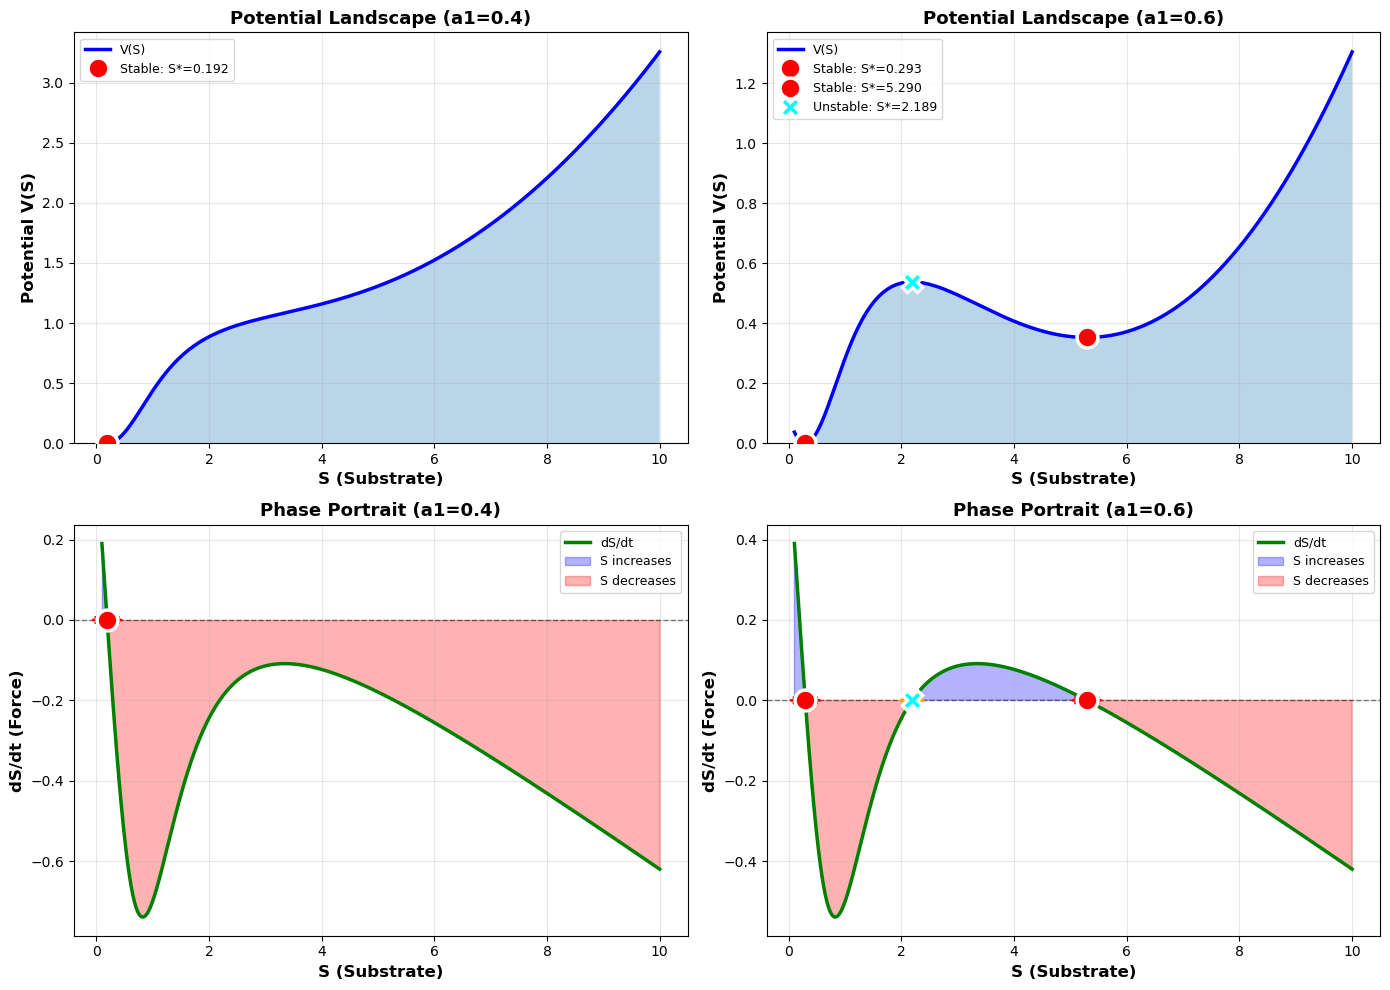

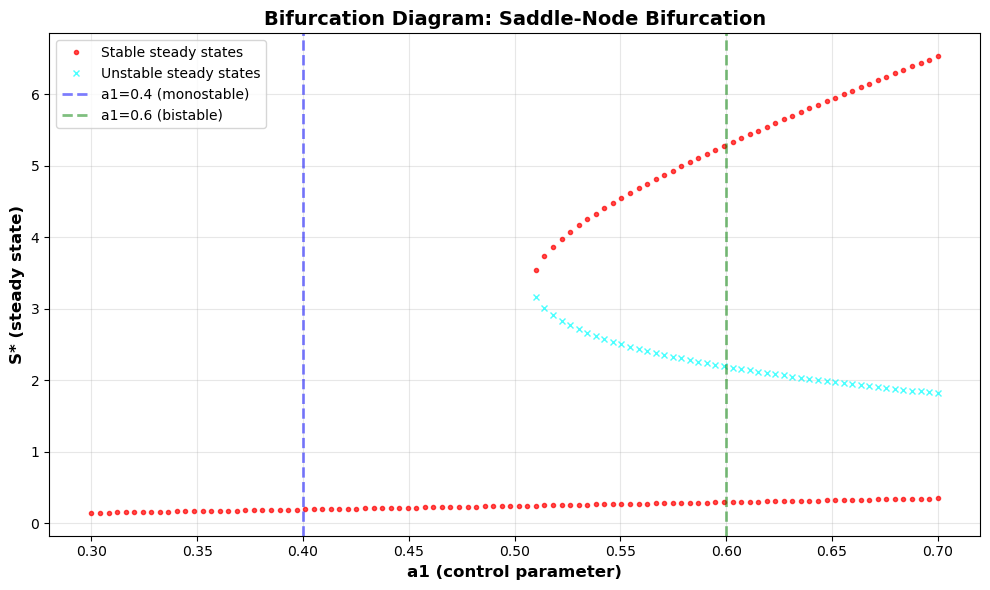

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import cumulative_trapezoid

def dS_dt(S, a1, b1, k_max, K_m, n, m):
    """First equation only - S dynamics independent of P"""
    enzymatic_rate = (k_max * S**n) / (K_m**m + S**m)
    return a1 - b1 * S - enzymatic_rate

def find_steady_states_1D(a1, b1, k_max, K_m, n, m):
    """Find steady states for S equation"""
    steady_states = []
    
    # Try multiple initial guesses
    for S_guess in np.linspace(0.1, 15, 50):
        try:
            sol = fsolve(lambda S: dS_dt(S, a1, b1, k_max, K_m, n, m), 
                        S_guess, full_output=True)
            if sol[2] == 1:  # Converged
                S_star = sol[0][0]
                if S_star > 0:  # Positive solution
                    residual = abs(dS_dt(S_star, a1, b1, k_max, K_m, n, m))
                    if residual < 1e-8:
                        # Check if new
                        is_new = True
                        for existing in steady_states:
                            if abs(S_star - existing) < 1e-4:
                                is_new = False
                                break
                        if is_new:
                            steady_states.append(S_star)
        except:
            pass
    
    return sorted(steady_states)

def check_stability_1D(S_star, a1, b1, k_max, K_m, n, m, epsilon=1e-6):
    """Check stability by examining derivative of dS/dt at steady state"""
    # Compute df/dS at steady state
    f_plus = dS_dt(S_star + epsilon, a1, b1, k_max, K_m, n, m)
    f_minus = dS_dt(S_star - epsilon, a1, b1, k_max, K_m, n, m)
    derivative = (f_plus - f_minus) / (2 * epsilon)
    
    # Stable if derivative < 0
    is_stable = derivative < 0
    
    return is_stable, derivative

def compute_potential_1D(a1, b1, k_max, K_m, n, m, S_range=(0.1, 10), resolution=1000):
    """
    Compute 1D potential V(S) such that dS/dt = -dV/dS
    
    This means: V(S) = -∫ f(S) dS where f(S) = dS/dt
    """
    S_array = np.linspace(S_range[0], S_range[1], resolution)
    
    # Compute dS/dt for all S values
    dS_dt_array = np.array([dS_dt(S, a1, b1, k_max, K_m, n, m) for S in S_array])
    
    # Integrate to get potential: V(S) = -∫ (dS/dt) dS
    # We integrate the negative of dS/dt
    potential = cumulative_trapezoid(-dS_dt_array, S_array, initial=0)
    
    # Shift so minimum is at zero
    potential = potential - np.min(potential)
    
    return S_array, potential, dS_dt_array

def plot_1D_potential_comparison():
    """Plot 1D potential for both a1 values side by side"""
    
    # Parameters
    b1 = 0.1
    k_max, K_m = 2, 1
    n, m = 1, 3
    a1_values = [0.4, 0.6]
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    colors_stable = ['red', 'blue', 'green']
    colors_unstable = ['orange']
    
    for idx, a1 in enumerate(a1_values):
        # Find steady states
        steady_states = find_steady_states_1D(a1, b1, k_max, K_m, n, m)
        
        print(f"\n{'='*50}")
        print(f"a1 = {a1}")
        print(f"{'='*50}")
        print(f"Found {len(steady_states)} steady state(s):")
        
        stable_states = []
        unstable_states = []
        
        for i, S_star in enumerate(steady_states):
            is_stable, derivative = check_stability_1D(S_star, a1, b1, k_max, K_m, n, m)
            stability = "STABLE" if is_stable else "UNSTABLE"
            print(f"  S* = {S_star:.6f}  [{stability}]  (df/dS = {derivative:.6f})")
            
            if is_stable:
                stable_states.append(S_star)
            else:
                unstable_states.append(S_star)
        
        # Compute potential and force
        S_array, potential, force = compute_potential_1D(a1, b1, k_max, K_m, n, m)
        
        # Top row: Potential V(S)
        ax_pot = axes[0, idx]
        ax_pot.plot(S_array, potential, 'b-', linewidth=2.5, label='V(S)')
        ax_pot.fill_between(S_array, 0, potential, alpha=0.3)
        
        # Mark stable steady states on potential
        for i, S_star in enumerate(stable_states):
            V_star = np.interp(S_star, S_array, potential)
            ax_pot.plot(S_star, V_star, 'o', color='red', markersize=15,
                       markeredgecolor='white', markeredgewidth=2.5,
                       label=f'Stable: S*={S_star:.3f}', zorder=5)
        
        # Mark unstable steady states on potential
        for i, S_star in enumerate(unstable_states):
            V_star = np.interp(S_star, S_array, potential)
            ax_pot.plot(S_star, V_star, 'X', color='cyan', markersize=15,
                       markeredgecolor='white', markeredgewidth=2.5,
                       label=f'Unstable: S*={S_star:.3f}', zorder=5)
        
        ax_pot.set_xlabel('S (Substrate)', fontsize=12, fontweight='bold')
        ax_pot.set_ylabel('Potential V(S)', fontsize=12, fontweight='bold')
        ax_pot.set_title(f'Potential Landscape (a1={a1})', fontsize=13, fontweight='bold')
        ax_pot.legend(loc='best', fontsize=9)
        ax_pot.grid(True, alpha=0.3)
        ax_pot.set_ylim(bottom=0)
        
        # Bottom row: Phase portrait (dS/dt vs S)
        ax_phase = axes[1, idx]
        ax_phase.plot(S_array, force, 'g-', linewidth=2.5, label='dS/dt')
        ax_phase.axhline(y=0, color='k', linestyle='--', linewidth=1, alpha=0.5)
        ax_phase.fill_between(S_array, 0, force, where=(force > 0), 
                             alpha=0.3, color='blue', label='S increases')
        ax_phase.fill_between(S_array, 0, force, where=(force < 0), 
                             alpha=0.3, color='red', label='S decreases')
        
        # Mark stable steady states
        for i, S_star in enumerate(stable_states):
            ax_phase.plot(S_star, 0, 'o', color='red', markersize=15,
                         markeredgecolor='white', markeredgewidth=2.5, zorder=5)
            # Add arrows showing stability
            ax_phase.annotate('', xy=(S_star, 0), xytext=(S_star - 0.3, 0),
                            arrowprops=dict(arrowstyle='->', color='red', lw=2))
            ax_phase.annotate('', xy=(S_star, 0), xytext=(S_star + 0.3, 0),
                            arrowprops=dict(arrowstyle='->', color='red', lw=2))
        
        # Mark unstable steady states
        for i, S_star in enumerate(unstable_states):
            ax_phase.plot(S_star, 0, 'X', color='cyan', markersize=15,
                         markeredgecolor='white', markeredgewidth=2.5, zorder=5)
            # Add arrows showing instability
            ax_phase.annotate('', xy=(S_star - 0.3, 0), xytext=(S_star, 0),
                            arrowprops=dict(arrowstyle='->', color='orange', lw=2))
            ax_phase.annotate('', xy=(S_star + 0.3, 0), xytext=(S_star, 0),
                            arrowprops=dict(arrowstyle='->', color='orange', lw=2))
        
        ax_phase.set_xlabel('S (Substrate)', fontsize=12, fontweight='bold')
        ax_phase.set_ylabel('dS/dt (Force)', fontsize=12, fontweight='bold')
        ax_phase.set_title(f'Phase Portrait (a1={a1})', fontsize=13, fontweight='bold')
        ax_phase.legend(loc='best', fontsize=9)
        ax_phase.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('potential_1D_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_combined_bifurcation():
    """Plot bifurcation diagram showing transition from monostable to bistable"""
    
    b1 = 0.1
    k_max, K_m = 2, 1
    n, m = 1, 3
    
    # Scan a1 values
    a1_values = np.linspace(0.3, 0.7, 100)
    
    all_stable = []
    all_unstable = []
    all_a1_stable = []
    all_a1_unstable = []
    
    for a1 in a1_values:
        steady_states = find_steady_states_1D(a1, b1, k_max, K_m, n, m)
        
        for S_star in steady_states:
            is_stable, _ = check_stability_1D(S_star, a1, b1, k_max, K_m, n, m)
            
            if is_stable:
                all_stable.append(S_star)
                all_a1_stable.append(a1)
            else:
                all_unstable.append(S_star)
                all_a1_unstable.append(a1)
    
    # Plot bifurcation diagram
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    
    if all_a1_stable:
        ax.plot(all_a1_stable, all_stable, 'o', color='red', 
               markersize=3, label='Stable steady states', alpha=0.7)
    if all_a1_unstable:
        ax.plot(all_a1_unstable, all_unstable, 'x', color='cyan', 
               markersize=4, label='Unstable steady states', alpha=0.7)
    
    ax.axvline(x=0.4, color='blue', linestyle='--', linewidth=2, 
              alpha=0.5, label='a1=0.4 (monostable)')
    ax.axvline(x=0.6, color='green', linestyle='--', linewidth=2, 
              alpha=0.5, label='a1=0.6 (bistable)')
    
    ax.set_xlabel('a1 (control parameter)', fontsize=12, fontweight='bold')
    ax.set_ylabel('S* (steady state)', fontsize=12, fontweight='bold')
    ax.set_title('Bifurcation Diagram: Saddle-Node Bifurcation', 
                fontsize=14, fontweight='bold')
    ax.legend(loc='best', fontsize=10)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('bifurcation_diagram_1D.png', dpi=300, bbox_inches='tight')
    plt.show()

# Run the analysis
print("="*60)
print("1D POTENTIAL LANDSCAPE ANALYSIS")
print("="*60)

plot_1D_potential_comparison()
plot_combined_bifurcation()

2D POTENTIAL LANDSCAPE ANALYSIS
Computing 2D potential landscape...


/var/folders/cs/lkcj7j890kv6kfxbkl56w9h80000gn/T/ipykernel_56050/2168353280.py:138: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax_main.scatter(unstable_S, unstable_a1, c='cyan', s=30, marker='x',


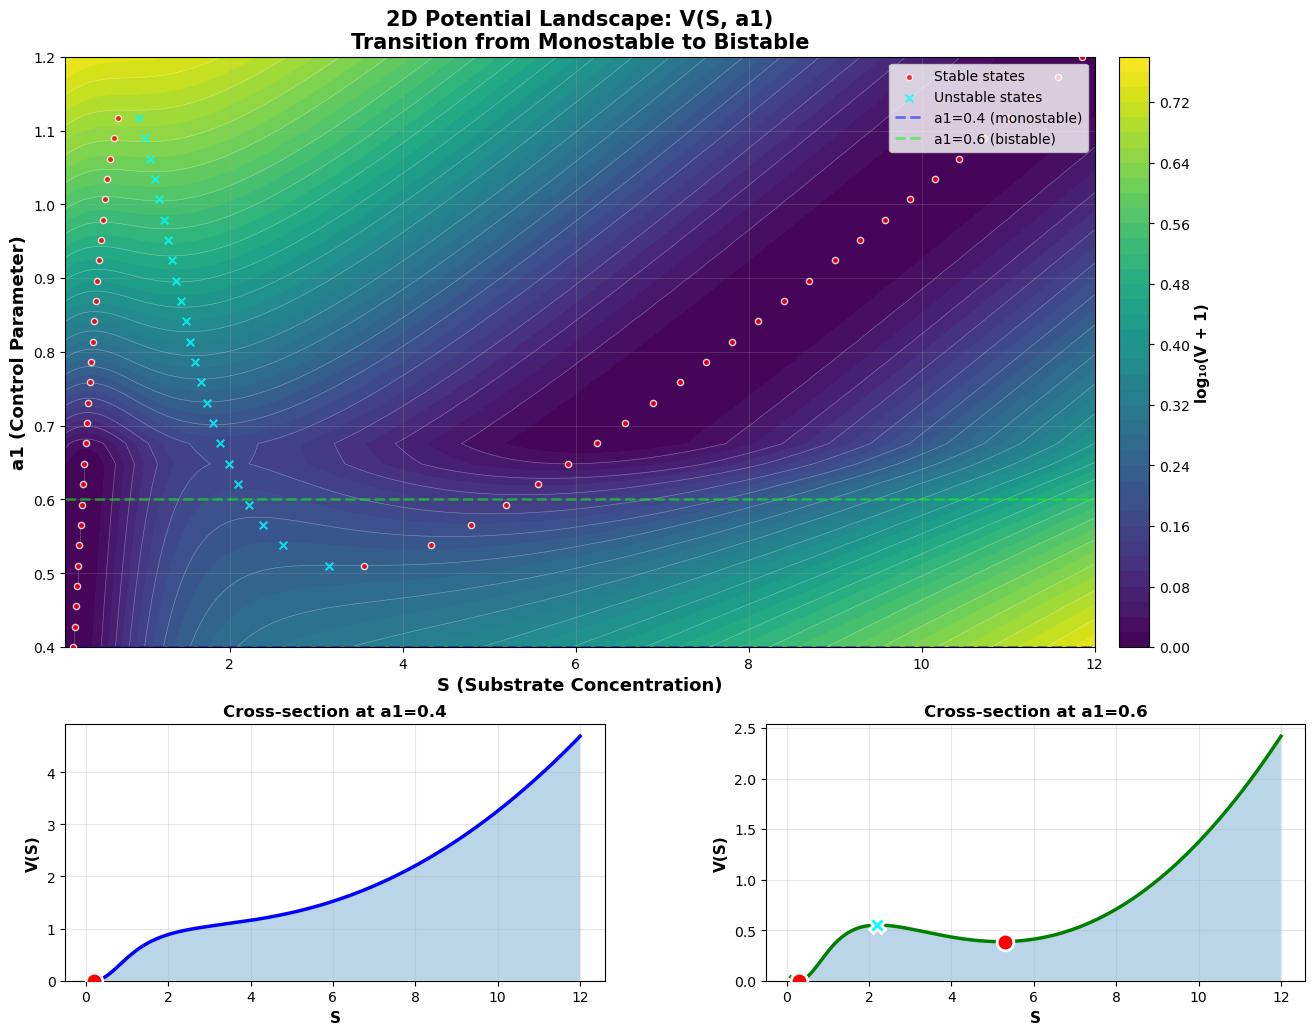


Done! 2D potential landscape created.


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import cumulative_trapezoid

def dS_dt(S, a1, b1, k_max, K_m, n, m):
    """First equation only - S dynamics independent of P"""
    enzymatic_rate = (k_max * S**n) / (K_m**m + S**m)
    return a1 - b1 * S - enzymatic_rate

def find_steady_states_1D(a1, b1, k_max, K_m, n, m):
    """Find steady states for S equation"""
    steady_states = []
    
    # Try multiple initial guesses
    for S_guess in np.linspace(0.1, 15, 50):
        try:
            sol = fsolve(lambda S: dS_dt(S, a1, b1, k_max, K_m, n, m), 
                        S_guess, full_output=True)
            if sol[2] == 1:  # Converged
                S_star = sol[0][0]
                if S_star > 0:  # Positive solution
                    residual = abs(dS_dt(S_star, a1, b1, k_max, K_m, n, m))
                    if residual < 1e-8:
                        # Check if new
                        is_new = True
                        for existing in steady_states:
                            if abs(S_star - existing) < 1e-4:
                                is_new = False
                                break
                        if is_new:
                            steady_states.append(S_star)
        except:
            pass
    
    return sorted(steady_states)

def check_stability_1D(S_star, a1, b1, k_max, K_m, n, m, epsilon=1e-6):
    """Check stability by examining derivative of dS/dt at steady state"""
    # Compute df/dS at steady state
    f_plus = dS_dt(S_star + epsilon, a1, b1, k_max, K_m, n, m)
    f_minus = dS_dt(S_star - epsilon, a1, b1, k_max, K_m, n, m)
    derivative = (f_plus - f_minus) / (2 * epsilon)
    
    # Stable if derivative < 0
    is_stable = derivative < 0
    
    return is_stable, derivative

def compute_potential_1D(a1, b1, k_max, K_m, n, m, S_range=(0.1, 12), resolution=1000):
    """
    Compute 1D potential V(S) such that dS/dt = -dV/dS
    
    This means: V(S) = -∫ f(S) dS where f(S) = dS/dt
    """
    S_array = np.linspace(S_range[0], S_range[1], resolution)
    
    # Compute dS/dt for all S values
    dS_dt_array = np.array([dS_dt(S, a1, b1, k_max, K_m, n, m) for S in S_array])
    
    # Integrate to get potential: V(S) = -∫ (dS/dt) dS
    # We integrate the negative of dS/dt
    potential = cumulative_trapezoid(-dS_dt_array, S_array, initial=0)
    
    # Shift so minimum is at zero
    potential = potential - np.min(potential)
    
    return S_array, potential, dS_dt_array

def plot_2D_potential_evolution():
    """
    Create a 2D heatmap showing potential V(S, a1) as function of both
    substrate concentration S and parameter a1
    """
    
    # Parameters
    b1 = 0.1
    k_max, K_m = 2, 1
    n, m = 1, 3
    
    # Create arrays
    a1_array = np.linspace(0.4, 1.2, 30)
    S_range = (0.1, 12)
    S_resolution = 500
    
    # Initialize potential matrix
    S_array = np.linspace(S_range[0], S_range[1], S_resolution)
    potential_matrix = np.zeros((len(a1_array), S_resolution))
    
    # Store steady states for each a1
    all_steady_states = []
    all_a1_for_states = []
    all_stability = []
    
    print("Computing 2D potential landscape...")
    for i, a1 in enumerate(a1_array):
        # Compute potential for this a1 value
        _, potential, _ = compute_potential_1D(a1, b1, k_max, K_m, n, m, 
                                               S_range, S_resolution)
        potential_matrix[i, :] = potential
        
        # Find steady states
        steady_states = find_steady_states_1D(a1, b1, k_max, K_m, n, m)
        for S_star in steady_states:
            is_stable, _ = check_stability_1D(S_star, a1, b1, k_max, K_m, n, m)
            all_steady_states.append(S_star)
            all_a1_for_states.append(a1)
            all_stability.append(is_stable)
    
    # Create figure with multiple subplots
    fig = plt.figure(figsize=(16, 12))
    gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)
    
    # Main 2D heatmap
    ax_main = fig.add_subplot(gs[0:2, :])
    
    # Use logarithmic scale for better visualization
    potential_plot = np.log10(potential_matrix + 1)
    
    im = ax_main.contourf(S_array, a1_array, potential_plot, 
                          levels=50, cmap='viridis')
    
    # Add contour lines
    contours = ax_main.contour(S_array, a1_array, potential_plot, 
                               levels=20, colors='white', alpha=0.3, linewidths=0.5)
    
    # Overlay steady states
    stable_S = [s for s, stable in zip(all_steady_states, all_stability) if stable]
    stable_a1 = [a for a, stable in zip(all_a1_for_states, all_stability) if stable]
    unstable_S = [s for s, stable in zip(all_steady_states, all_stability) if not stable]
    unstable_a1 = [a for a, stable in zip(all_a1_for_states, all_stability) if not stable]
    
    if stable_S:
        ax_main.scatter(stable_S, stable_a1, c='red', s=20, marker='o',
                       edgecolors='white', linewidths=1, zorder=5,
                       label='Stable states', alpha=0.8)
    if unstable_S:
        ax_main.scatter(unstable_S, unstable_a1, c='cyan', s=30, marker='x',
                       edgecolors='white', linewidths=1.5, zorder=5,
                       label='Unstable states', alpha=0.8)
    
    # Mark special a1 values
    ax_main.axhline(y=0.4, color='blue', linestyle='--', linewidth=2, 
                   alpha=0.5, label='a1=0.4 (monostable)')
    ax_main.axhline(y=0.6, color='lime', linestyle='--', linewidth=2, 
                   alpha=0.5, label='a1=0.6 (bistable)')
    
    ax_main.set_xlabel('S (Substrate Concentration)', fontsize=13, fontweight='bold')
    ax_main.set_ylabel('a1 (Control Parameter)', fontsize=13, fontweight='bold')
    ax_main.set_title('2D Potential Landscape: V(S, a1)\nTransition from Monostable to Bistable', 
                     fontsize=15, fontweight='bold')
    ax_main.legend(loc='upper right', fontsize=10)
    ax_main.grid(True, alpha=0.2)
    
    cbar = plt.colorbar(im, ax=ax_main, pad=0.02)
    cbar.set_label('log₁₀(V + 1)', fontsize=11, fontweight='bold')
    
    # Bottom left: Cross-section at a1=0.4
    ax_bottom_left = fig.add_subplot(gs[2, 0])
    idx_04 = np.argmin(np.abs(a1_array - 0.4))
    ax_bottom_left.plot(S_array, potential_matrix[idx_04, :], 'b-', linewidth=2.5)
    ax_bottom_left.fill_between(S_array, 0, potential_matrix[idx_04, :], alpha=0.3)
    
    # Mark steady states for a1=0.4
    steady_04 = find_steady_states_1D(0.4, b1, k_max, K_m, n, m)
    for S_star in steady_04:
        is_stable, _ = check_stability_1D(S_star, 0.4, b1, k_max, K_m, n, m)
        V_star = np.interp(S_star, S_array, potential_matrix[idx_04, :])
        if is_stable:
            ax_bottom_left.plot(S_star, V_star, 'o', color='red', markersize=12,
                              markeredgecolor='white', markeredgewidth=2, zorder=5)
        else:
            ax_bottom_left.plot(S_star, V_star, 'X', color='cyan', markersize=12,
                              markeredgecolor='white', markeredgewidth=2, zorder=5)
    
    ax_bottom_left.set_xlabel('S', fontsize=11, fontweight='bold')
    ax_bottom_left.set_ylabel('V(S)', fontsize=11, fontweight='bold')
    ax_bottom_left.set_title('Cross-section at a1=0.4', fontsize=12, fontweight='bold')
    ax_bottom_left.grid(True, alpha=0.3)
    ax_bottom_left.set_ylim(bottom=0)
    
    # Bottom right: Cross-section at a1=0.6
    ax_bottom_right = fig.add_subplot(gs[2, 1])
    idx_06 = np.argmin(np.abs(a1_array - 0.6))
    ax_bottom_right.plot(S_array, potential_matrix[idx_06, :], 'g-', linewidth=2.5)
    ax_bottom_right.fill_between(S_array, 0, potential_matrix[idx_06, :], alpha=0.3)
    
    # Mark steady states for a1=0.6
    steady_06 = find_steady_states_1D(0.6, b1, k_max, K_m, n, m)
    for S_star in steady_06:
        is_stable, _ = check_stability_1D(S_star, 0.6, b1, k_max, K_m, n, m)
        V_star = np.interp(S_star, S_array, potential_matrix[idx_06, :])
        if is_stable:
            ax_bottom_right.plot(S_star, V_star, 'o', color='red', markersize=12,
                                markeredgecolor='white', markeredgewidth=2, zorder=5)
        else:
            ax_bottom_right.plot(S_star, V_star, 'X', color='cyan', markersize=12,
                                markeredgecolor='white', markeredgewidth=2, zorder=5)
    
    ax_bottom_right.set_xlabel('S', fontsize=11, fontweight='bold')
    ax_bottom_right.set_ylabel('V(S)', fontsize=11, fontweight='bold')
    ax_bottom_right.set_title('Cross-section at a1=0.6', fontsize=12, fontweight='bold')
    ax_bottom_right.grid(True, alpha=0.3)
    ax_bottom_right.set_ylim(bottom=0)
    
    plt.savefig('potential_2D_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\nDone! 2D potential landscape created.")

# Run the 2D analysis
print("="*60)
print("2D POTENTIAL LANDSCAPE ANALYSIS")
print("="*60)

plot_2D_potential_evolution()

3D WADDINGTON LANDSCAPE ANALYSIS
Computing 3D Waddington landscape...


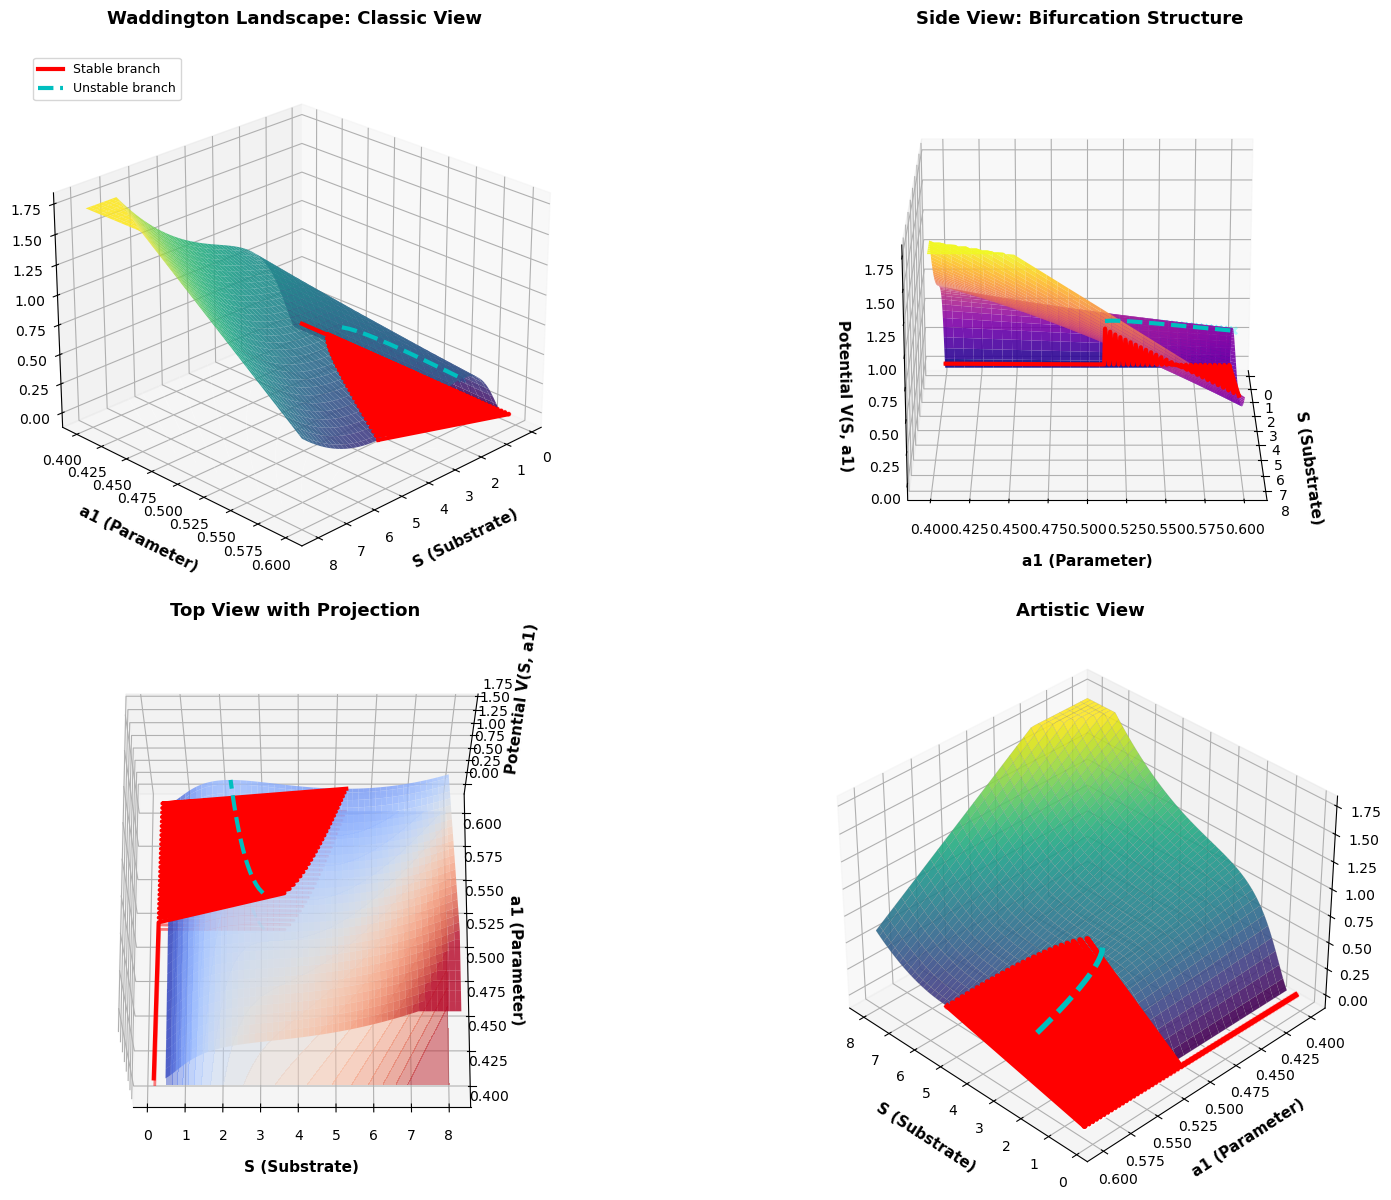

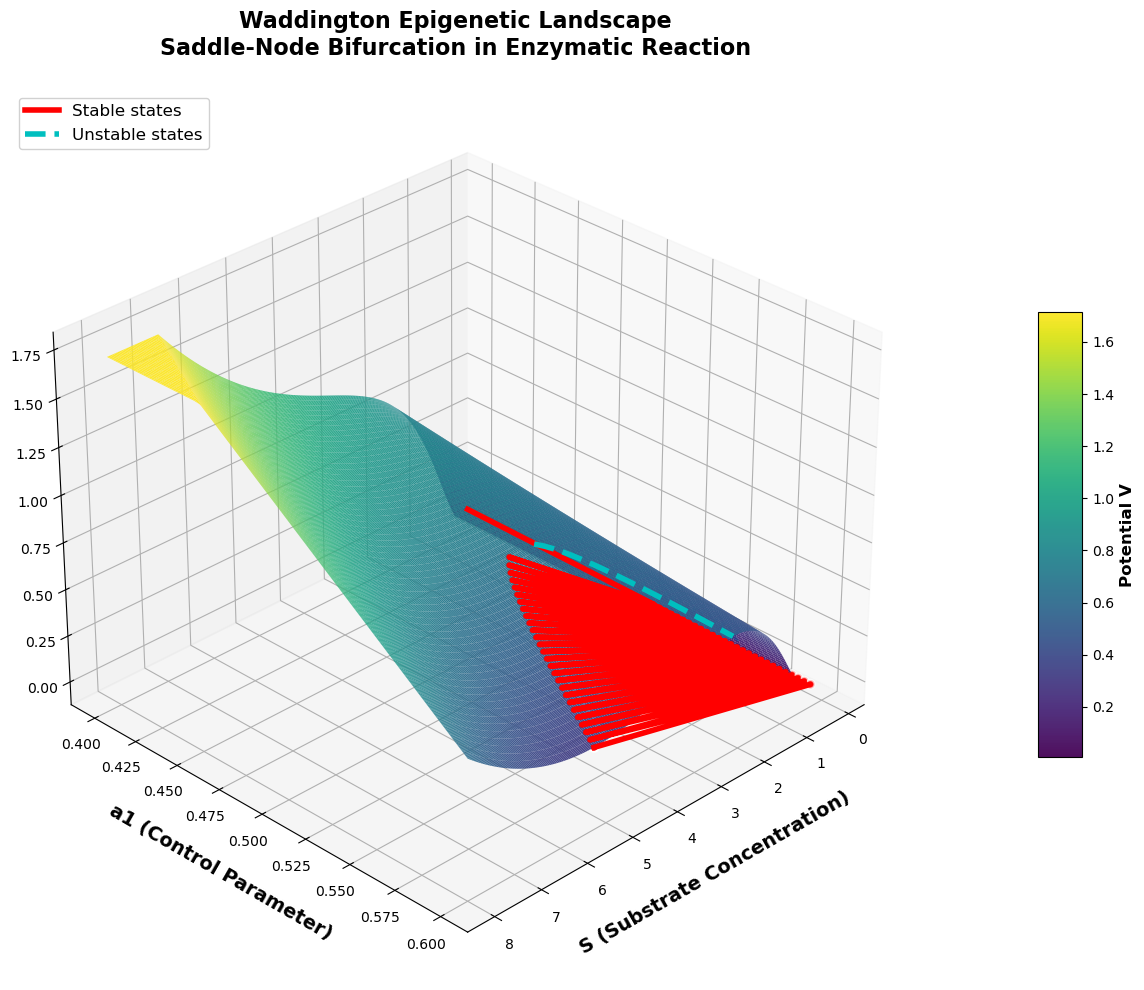


Done! Waddington landscapes created.
  - Found 114 total steady state points
  - Stable states: 87
  - Unstable states: 27


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.optimize import fsolve
from scipy.integrate import cumulative_trapezoid

def dS_dt(S, a1, b1, k_max, K_m, n, m):
    """First equation only - S dynamics independent of P"""
    enzymatic_rate = (k_max * S**n) / (K_m**m + S**m)
    return a1 - b1 * S - enzymatic_rate

def find_steady_states_1D(a1, b1, k_max, K_m, n, m):
    """Find steady states for S equation"""
    steady_states = []
    
    # Try multiple initial guesses
    for S_guess in np.linspace(0.1, 15, 50):
        try:
            sol = fsolve(lambda S: dS_dt(S, a1, b1, k_max, K_m, n, m), 
                        S_guess, full_output=True)
            if sol[2] == 1:  # Converged
                S_star = sol[0][0]
                if S_star > 0:  # Positive solution
                    residual = abs(dS_dt(S_star, a1, b1, k_max, K_m, n, m))
                    if residual < 1e-8:
                        # Check if new
                        is_new = True
                        for existing in steady_states:
                            if abs(S_star - existing) < 1e-4:
                                is_new = False
                                break
                        if is_new:
                            steady_states.append(S_star)
        except:
            pass
    
    return sorted(steady_states)

def check_stability_1D(S_star, a1, b1, k_max, K_m, n, m, epsilon=1e-6):
    """Check stability by examining derivative of dS/dt at steady state"""
    # Compute df/dS at steady state
    f_plus = dS_dt(S_star + epsilon, a1, b1, k_max, K_m, n, m)
    f_minus = dS_dt(S_star - epsilon, a1, b1, k_max, K_m, n, m)
    derivative = (f_plus - f_minus) / (2 * epsilon)
    
    # Stable if derivative < 0
    is_stable = derivative < 0
    
    return is_stable, derivative

def compute_potential_1D(a1, b1, k_max, K_m, n, m, S_range=(0.1, 10), resolution=1000):
    """
    Compute 1D potential V(S) such that dS/dt = -dV/dS
    
    This means: V(S) = -∫ f(S) dS where f(S) = dS/dt
    """
    S_array = np.linspace(S_range[0], S_range[1], resolution)
    
    # Compute dS/dt for all S values
    dS_dt_array = np.array([dS_dt(S, a1, b1, k_max, K_m, n, m) for S in S_array])
    
    # Integrate to get potential: V(S) = -∫ (dS/dt) dS
    # We integrate the negative of dS/dt
    potential = cumulative_trapezoid(-dS_dt_array, S_array, initial=0)
    
    # Shift so minimum is at zero
    potential = potential - np.min(potential)
    
    return S_array, potential, dS_dt_array

def plot_waddington_landscape():
    """
    Create a beautiful 3D Waddington-style epigenetic landscape
    showing the potential V(S, a1) as a 3D surface
    """
    
    # Parameters
    b1 = 0.1
    k_max, K_m = 2, 1
    n, m = 1, 3
    
    # Create arrays with higher resolution for smooth surface
    a1_array = np.linspace(0.4, 0.6, 60)
    S_range = (0.5, 8)
    S_resolution = 400
    
    # Initialize potential matrix
    S_array = np.linspace(S_range[0], S_range[1], S_resolution)
    potential_matrix = np.zeros((len(a1_array), S_resolution))
    
    # Store steady states for each a1
    all_steady_states = []
    all_a1_for_states = []
    all_stability = []
    
    print("Computing 3D Waddington landscape...")
    for i, a1 in enumerate(a1_array):
        # Compute potential for this a1 value
        _, potential, _ = compute_potential_1D(a1, b1, k_max, K_m, n, m, 
                                               S_range, S_resolution)
        potential_matrix[i, :] = potential
        
        # Find steady states
        steady_states = find_steady_states_1D(a1, b1, k_max, K_m, n, m)
        for S_star in steady_states:
            is_stable, _ = check_stability_1D(S_star, a1, b1, k_max, K_m, n, m)
            all_steady_states.append(S_star)
            all_a1_for_states.append(a1)
            all_stability.append(is_stable)
    
    # Create meshgrid for 3D plot
    S_mesh, a1_mesh = np.meshgrid(S_array, a1_array)
    
    # Cap the potential for better visualization
    V_plot = potential_matrix.copy()
    V_max = np.percentile(V_plot, 98)
    V_plot = np.clip(V_plot, 0, V_max)
    
    # Create figure with multiple 3D views
    fig = plt.figure(figsize=(18, 12))
    
    # ========== View 1: Classic Waddington perspective ==========
    ax1 = fig.add_subplot(2, 2, 1, projection='3d')
    
    # Create surface with smooth shading
    surf1 = ax1.plot_surface(S_mesh, a1_mesh, V_plot, 
                            cmap='viridis', alpha=0.9,
                            edgecolor='none', 
                            linewidth=0, 
                            antialiased=True,
                            shade=True)
    
    # Add contour lines on the surface for depth perception
    ax1.contour(S_mesh, a1_mesh, V_plot, 
               levels=15, colors='white', alpha=0.3, linewidths=0.5,
               offset=np.min(V_plot))
    
    # Plot steady state trajectories
    stable_S = np.array([s for s, stable in zip(all_steady_states, all_stability) if stable])
    stable_a1 = np.array([a for a, stable in zip(all_a1_for_states, all_stability) if stable])
    unstable_S = np.array([s for s, stable in zip(all_steady_states, all_stability) if not stable])
    unstable_a1 = np.array([a for a, stable in zip(all_a1_for_states, all_stability) if not stable])
    
    if len(stable_S) > 0:
        # Interpolate V values for stable states
        stable_V = np.array([np.interp(S, S_array, potential_matrix[np.argmin(np.abs(a1_array - a)), :]) 
                            for S, a in zip(stable_S, stable_a1)])
        ax1.plot(stable_S, stable_a1, stable_V, 'r-', linewidth=3, 
                label='Stable branch', zorder=10)
        ax1.scatter(stable_S, stable_a1, stable_V, c='red', s=15, 
                   edgecolors='white', linewidths=0.5, zorder=11)
    
    if len(unstable_S) > 0:
        unstable_V = np.array([np.interp(S, S_array, potential_matrix[np.argmin(np.abs(a1_array - a)), :]) 
                              for S, a in zip(unstable_S, unstable_a1)])
        ax1.plot(unstable_S, unstable_a1, unstable_V, 'c--', linewidth=3, 
                label='Unstable branch', zorder=10)
        ax1.scatter(unstable_S, unstable_a1, unstable_V, c='cyan', s=25, 
                   marker='x', linewidths=2, zorder=11)
    
    ax1.set_xlabel('S (Substrate)', fontsize=11, fontweight='bold', labelpad=10)
    ax1.set_ylabel('a1 (Parameter)', fontsize=11, fontweight='bold', labelpad=10)
    ax1.set_zlabel('Potential V(S, a1)', fontsize=11, fontweight='bold', labelpad=10)
    ax1.set_title('Waddington Landscape: Classic View', fontsize=13, fontweight='bold', pad=20)
    ax1.view_init(elev=25, azim=45)
    ax1.legend(loc='upper left', fontsize=9)
    
    # ========== View 2: Side view emphasizing bifurcation ==========
    ax2 = fig.add_subplot(2, 2, 2, projection='3d')
    
    surf2 = ax2.plot_surface(S_mesh, a1_mesh, V_plot, 
                            cmap='plasma', alpha=0.9,
                            edgecolor='none', 
                            linewidth=0, 
                            antialiased=True,
                            shade=True)
    
    if len(stable_S) > 0:
        ax2.plot(stable_S, stable_a1, stable_V, 'r-', linewidth=3, zorder=10)
        ax2.scatter(stable_S, stable_a1, stable_V, c='red', s=15, 
                   edgecolors='white', linewidths=0.5, zorder=11)
    
    if len(unstable_S) > 0:
        ax2.plot(unstable_S, unstable_a1, unstable_V, 'c--', linewidth=3, zorder=10)
        ax2.scatter(unstable_S, unstable_a1, unstable_V, c='cyan', s=25, 
                   marker='x', linewidths=2, zorder=11)
    
    ax2.set_xlabel('S (Substrate)', fontsize=11, fontweight='bold', labelpad=10)
    ax2.set_ylabel('a1 (Parameter)', fontsize=11, fontweight='bold', labelpad=10)
    ax2.set_zlabel('Potential V(S, a1)', fontsize=11, fontweight='bold', labelpad=10)
    ax2.set_title('Side View: Bifurcation Structure', fontsize=13, fontweight='bold', pad=20)
    ax2.view_init(elev=20, azim=0)
    
    # ========== View 3: Top-down view with projection ==========
    ax3 = fig.add_subplot(2, 2, 3, projection='3d')
    
    surf3 = ax3.plot_surface(S_mesh, a1_mesh, V_plot, 
                            cmap='coolwarm', alpha=0.8,
                            edgecolor='none', 
                            linewidth=0, 
                            antialiased=True,
                            shade=True)
    
    # Add contour projection on bottom
    ax3.contourf(S_mesh, a1_mesh, V_plot, 
                levels=20, cmap='coolwarm', alpha=0.5,
                offset=np.min(V_plot) - V_max*0.1, zorder=0)
    
    if len(stable_S) > 0:
        ax3.plot(stable_S, stable_a1, stable_V, 'r-', linewidth=3, zorder=10)
        # Project to bottom
        ax3.plot(stable_S, stable_a1, np.min(V_plot) - V_max*0.1, 'r-', 
                linewidth=2, alpha=0.5, zorder=1)
    
    if len(unstable_S) > 0:
        ax3.plot(unstable_S, unstable_a1, unstable_V, 'c--', linewidth=3, zorder=10)
        ax3.plot(unstable_S, unstable_a1, np.min(V_plot) - V_max*0.1, 'c--', 
                linewidth=2, alpha=0.5, zorder=1)
    
    ax3.set_xlabel('S (Substrate)', fontsize=11, fontweight='bold', labelpad=10)
    ax3.set_ylabel('a1 (Parameter)', fontsize=11, fontweight='bold', labelpad=10)
    ax3.set_zlabel('Potential V(S, a1)', fontsize=11, fontweight='bold', labelpad=10)
    ax3.set_title('Top View with Projection', fontsize=13, fontweight='bold', pad=20)
    ax3.view_init(elev=70, azim=-90)
    
    # ========== View 4: Artistic angle ==========
    ax4 = fig.add_subplot(2, 2, 4, projection='3d')
    
    surf4 = ax4.plot_surface(S_mesh, a1_mesh, V_plot, 
                            cmap='viridis', alpha=0.9,
                            edgecolor='gray', 
                            linewidth=0.1, 
                            antialiased=True,
                            shade=True)
    
    if len(stable_S) > 0:
        ax4.plot(stable_S, stable_a1, stable_V, 'r-', linewidth=4, zorder=10)
        ax4.scatter(stable_S, stable_a1, stable_V, c='red', s=30, 
                   edgecolors='white', linewidths=1, zorder=11)
    
    if len(unstable_S) > 0:
        ax4.plot(unstable_S, unstable_a1, unstable_V, 'c--', linewidth=4, zorder=10)
        ax4.scatter(unstable_S, unstable_a1, unstable_V, c='cyan', s=40, 
                   marker='x', linewidths=2, zorder=11)
    
    ax4.set_xlabel('S (Substrate)', fontsize=11, fontweight='bold', labelpad=10)
    ax4.set_ylabel('a1 (Parameter)', fontsize=11, fontweight='bold', labelpad=10)
    ax4.set_zlabel('Potential V(S, a1)', fontsize=11, fontweight='bold', labelpad=10)
    ax4.set_title('Artistic View', fontsize=13, fontweight='bold', pad=20)
    ax4.view_init(elev=35, azim=135)
    
    plt.tight_layout()
    plt.savefig('waddington_landscape_3D.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Create a single large high-quality view
    fig2 = plt.figure(figsize=(14, 10))
    ax_large = fig2.add_subplot(111, projection='3d')
    
    surf_large = ax_large.plot_surface(S_mesh, a1_mesh, V_plot, 
                                      cmap='viridis', alpha=0.95,
                                      edgecolor='none', 
                                      linewidth=0, 
                                      antialiased=True,
                                      shade=True,
                                      rcount=200, ccount=200)
    
    # Add subtle contour lines
    ax_large.contour(S_mesh, a1_mesh, V_plot, 
                    levels=20, colors='white', alpha=0.2, linewidths=0.5)
    
    if len(stable_S) > 0:
        ax_large.plot(stable_S, stable_a1, stable_V, 'r-', linewidth=4, 
                     label='Stable states', zorder=10)
        ax_large.scatter(stable_S, stable_a1, stable_V, c='red', s=40, 
                        edgecolors='white', linewidths=1.5, zorder=11)
    
    if len(unstable_S) > 0:
        ax_large.plot(unstable_S, unstable_a1, unstable_V, 'c--', linewidth=4, 
                     label='Unstable states', zorder=10)
        ax_large.scatter(unstable_S, unstable_a1, unstable_V, c='cyan', s=50, 
                        marker='x', linewidths=2.5, zorder=11)
    
    ax_large.set_xlabel('S (Substrate Concentration)', fontsize=14, fontweight='bold', labelpad=12)
    ax_large.set_ylabel('a1 (Control Parameter)', fontsize=14, fontweight='bold', labelpad=12)
    ax_large.set_zlabel('Potential Energy V(S, a1)', fontsize=14, fontweight='bold', labelpad=12)
    ax_large.set_title('Waddington Epigenetic Landscape\nSaddle-Node Bifurcation in Enzymatic Reaction', 
                      fontsize=16, fontweight='bold', pad=25)
    ax_large.view_init(elev=30, azim=45)
    ax_large.legend(loc='upper left', fontsize=12, framealpha=0.9)
    
    # Add colorbar
    cbar = fig2.colorbar(surf_large, ax=ax_large, shrink=0.5, aspect=10, pad=0.1)
    cbar.set_label('Potential V', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('waddington_landscape_3D_large.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\nDone! Waddington landscapes created.")
    print(f"  - Found {len(set(zip(all_steady_states, all_a1_for_states)))} total steady state points")
    print(f"  - Stable states: {sum(all_stability)}")
    print(f"  - Unstable states: {len(all_stability) - sum(all_stability)}")

# Run the 3D Waddington landscape analysis
print("="*60)
print("3D WADDINGTON LANDSCAPE ANALYSIS")
print("="*60)

plot_waddington_landscape()

# Plotly graph

INTERACTIVE PLOTLY WADDINGTON LANDSCAPE
Computing interactive Waddington landscape...

✓ Interactive plot saved to: waddington_landscape_interactive.html


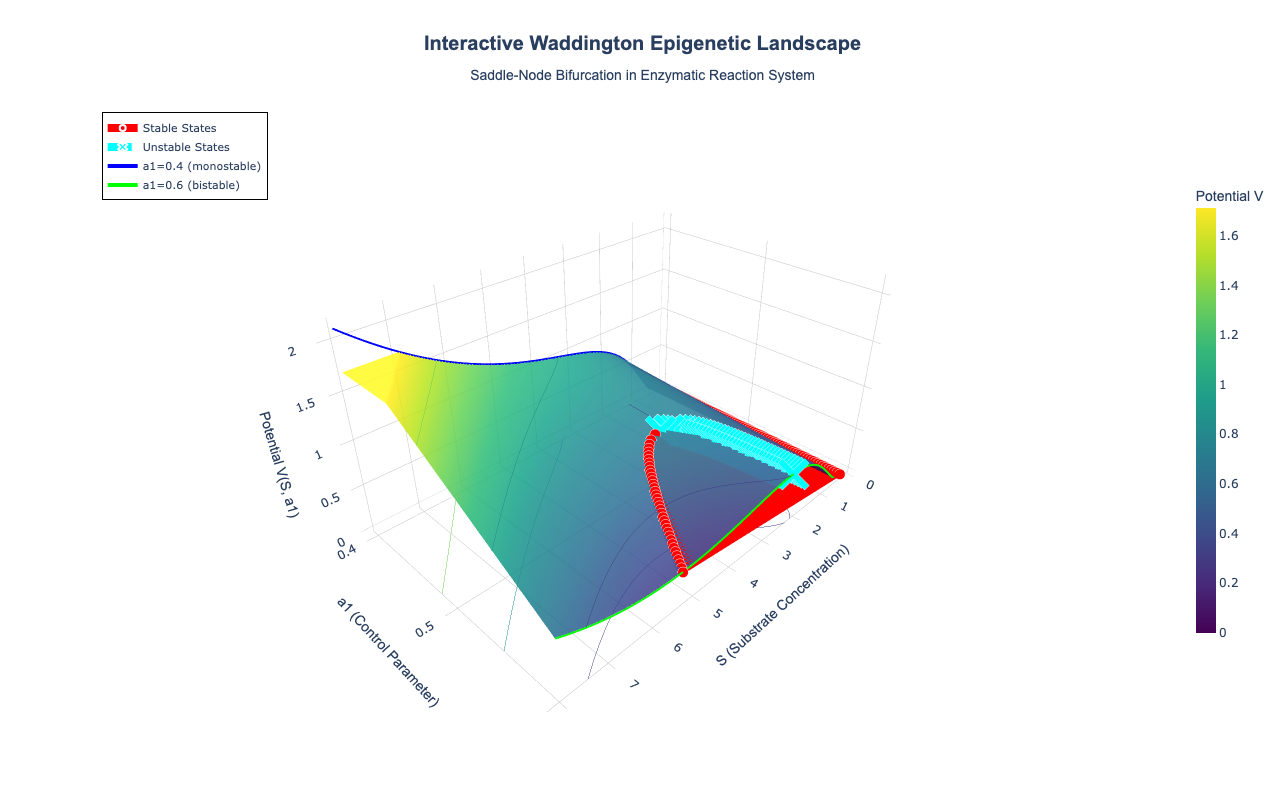


EXPORT OPTIONS:
1. Open 'waddington_landscape_interactive.html' in your browser
2. Interactive controls:
   - Rotate: Click and drag
   - Zoom: Scroll or pinch
   - Pan: Right-click and drag
   - Reset view: Double-click
3. Download static PNG using camera icon in toolbar
4. HTML file is self-contained and shareable!


In [24]:
import numpy as np
import plotly.graph_objects as go
from scipy.optimize import fsolve
from scipy.integrate import cumulative_trapezoid

def dS_dt(S, a1, b1, k_max, K_m, n, m):
    """First equation only - S dynamics independent of P"""
    enzymatic_rate = (k_max * S**n) / (K_m**m + S**m)
    return a1 - b1 * S - enzymatic_rate

def find_steady_states_1D(a1, b1, k_max, K_m, n, m):
    """Find steady states for S equation"""
    steady_states = []
    
    for S_guess in np.linspace(0.1, 15, 50):
        try:
            sol = fsolve(lambda S: dS_dt(S, a1, b1, k_max, K_m, n, m), 
                        S_guess, full_output=True)
            if sol[2] == 1:
                S_star = sol[0][0]
                if S_star > 0:
                    residual = abs(dS_dt(S_star, a1, b1, k_max, K_m, n, m))
                    if residual < 1e-8:
                        is_new = True
                        for existing in steady_states:
                            if abs(S_star - existing) < 1e-4:
                                is_new = False
                                break
                        if is_new:
                            steady_states.append(S_star)
        except:
            pass
    
    return sorted(steady_states)

def check_stability_1D(S_star, a1, b1, k_max, K_m, n, m, epsilon=1e-6):
    """Check stability by examining derivative of dS/dt at steady state"""
    f_plus = dS_dt(S_star + epsilon, a1, b1, k_max, K_m, n, m)
    f_minus = dS_dt(S_star - epsilon, a1, b1, k_max, K_m, n, m)
    derivative = (f_plus - f_minus) / (2 * epsilon)
    is_stable = derivative < 0
    return is_stable, derivative

def compute_potential_1D(a1, b1, k_max, K_m, n, m, S_range=(0.1, 10), resolution=1000):
    """Compute 1D potential V(S) such that dS/dt = -dV/dS"""
    S_array = np.linspace(S_range[0], S_range[1], resolution)
    dS_dt_array = np.array([dS_dt(S, a1, b1, k_max, K_m, n, m) for S in S_array])
    potential = cumulative_trapezoid(-dS_dt_array, S_array, initial=0)
    potential = potential - np.min(potential)
    return S_array, potential, dS_dt_array

def create_interactive_waddington_landscape():
    """Create an interactive 3D Waddington landscape using Plotly"""
    
    # Parameters
    b1 = 0.1
    k_max, K_m = 2, 1
    n, m = 1, 3
    
    # Create arrays with high resolution
    a1_array = np.linspace(0.4, 0.6, 80)
    S_range = (0.5, 8)
    S_resolution = 500
    
    # Initialize potential matrix
    S_array = np.linspace(S_range[0], S_range[1], S_resolution)
    potential_matrix = np.zeros((len(a1_array), S_resolution))
    
    # Store steady states
    all_steady_states = []
    all_a1_for_states = []
    all_stability = []
    all_V_for_states = []
    
    print("Computing interactive Waddington landscape...")
    for i, a1 in enumerate(a1_array):
        _, potential, _ = compute_potential_1D(a1, b1, k_max, K_m, n, m, 
                                               S_range, S_resolution)
        potential_matrix[i, :] = potential
        
        steady_states = find_steady_states_1D(a1, b1, k_max, K_m, n, m)
        for S_star in steady_states:
            is_stable, _ = check_stability_1D(S_star, a1, b1, k_max, K_m, n, m)
            V_star = np.interp(S_star, S_array, potential)
            all_steady_states.append(S_star)
            all_a1_for_states.append(a1)
            all_stability.append(is_stable)
            all_V_for_states.append(V_star)
    
    # Create meshgrid
    S_mesh, a1_mesh = np.meshgrid(S_array, a1_array)
    
    # Cap the potential for better visualization
    V_plot = potential_matrix.copy()
    V_max = np.percentile(V_plot, 98)
    V_plot = np.clip(V_plot, 0, V_max)
    
    # Separate stable and unstable states
    stable_S = np.array([s for s, stable in zip(all_steady_states, all_stability) if stable])
    stable_a1 = np.array([a for a, stable in zip(all_a1_for_states, all_stability) if stable])
    stable_V = np.array([v for v, stable in zip(all_V_for_states, all_stability) if stable])
    
    unstable_S = np.array([s for s, stable in zip(all_steady_states, all_stability) if not stable])
    unstable_a1 = np.array([a for a, stable in zip(all_a1_for_states, all_stability) if not stable])
    unstable_V = np.array([v for v, stable in zip(all_V_for_states, all_stability) if not stable])
    
    # Create the figure
    fig = go.Figure()
    
    # Add the main surface
    fig.add_trace(go.Surface(
        x=S_mesh,
        y=a1_mesh,
        z=V_plot,
        colorscale='Viridis',
        opacity=0.95,
        name='Potential Landscape',
        colorbar=dict(
            title=dict(
                text='Potential V',
                font=dict(size=14, family='Arial, sans-serif')
            ),
            tickfont=dict(size=12),
            len=0.75,
            thickness=20
        ),
        contours=dict(
            z=dict(
                show=True,
                usecolormap=True,
                highlightcolor="white",
                project=dict(z=True)
            )
        ),
        hovertemplate='<b>S</b>: %{x:.3f}<br><b>a1</b>: %{y:.3f}<br><b>V</b>: %{z:.3f}<extra></extra>'
    ))
    
    # Add stable steady states trajectory
    if len(stable_S) > 0:
        fig.add_trace(go.Scatter3d(
            x=stable_S,
            y=stable_a1,
            z=stable_V,
            mode='lines+markers',
            name='Stable States',
            line=dict(color='red', width=8),
            marker=dict(
                size=6,
                color='red',
                symbol='circle',
                line=dict(color='white', width=2)
            ),
            hovertemplate='<b>Stable State</b><br>S: %{x:.4f}<br>a1: %{y:.4f}<br>V: %{z:.4f}<extra></extra>'
        ))
    
    # Add unstable steady states trajectory
    if len(unstable_S) > 0:
        fig.add_trace(go.Scatter3d(
            x=unstable_S,
            y=unstable_a1,
            z=unstable_V,
            mode='lines+markers',
            name='Unstable States',
            line=dict(color='cyan', width=8, dash='dash'),
            marker=dict(
                size=8,
                color='cyan',
                symbol='x',
                line=dict(color='white', width=2)
            ),
            hovertemplate='<b>Unstable State</b><br>S: %{x:.4f}<br>a1: %{y:.4f}<br>V: %{z:.4f}<extra></extra>'
        ))
    
    # Add reference planes
    idx_04 = np.argmin(np.abs(a1_array - 0.4))
    S_plane = np.linspace(S_range[0], S_range[1], 50)
    a1_plane_04 = np.full_like(S_plane, 0.4)
    V_plane_04 = np.interp(S_plane, S_array, potential_matrix[idx_04, :])
    
    fig.add_trace(go.Scatter3d(
        x=S_plane,
        y=a1_plane_04,
        z=V_plane_04,
        mode='lines',
        name='a1=0.4 (monostable)',
        line=dict(color='blue', width=4),
        hovertemplate='<b>a1=0.4</b><br>S: %{x:.3f}<br>V: %{z:.3f}<extra></extra>'
    ))
    
    idx_06 = np.argmin(np.abs(a1_array - 0.6))
    a1_plane_06 = np.full_like(S_plane, 0.6)
    V_plane_06 = np.interp(S_plane, S_array, potential_matrix[idx_06, :])
    
    fig.add_trace(go.Scatter3d(
        x=S_plane,
        y=a1_plane_06,
        z=V_plane_06,
        mode='lines',
        name='a1=0.6 (bistable)',
        line=dict(color='lime', width=4),
        hovertemplate='<b>a1=0.6</b><br>S: %{x:.3f}<br>V: %{z:.3f}<extra></extra>'
    ))
    
    # Update layout - FIXED: removed titlefont, use title with text property
    fig.update_layout(
        title=dict(
            text='<b>Interactive Waddington Epigenetic Landscape</b><br>' +
                 '<sub>Saddle-Node Bifurcation in Enzymatic Reaction System</sub>',
            x=0.5,
            xanchor='center',
            font=dict(size=20, family='Arial, sans-serif')
        ),
        scene=dict(
            xaxis=dict(
                title=dict(text='S (Substrate Concentration)', 
                          font=dict(size=14, family='Arial, sans-serif')),
                gridcolor='lightgray',
                showbackground=True,
                backgroundcolor='rgba(230, 230, 230, 0.5)'
            ),
            yaxis=dict(
                title=dict(text='a1 (Control Parameter)', 
                          font=dict(size=14, family='Arial, sans-serif')),
                gridcolor='lightgray',
                showbackground=True,
                backgroundcolor='rgba(230, 230, 230, 0.5)'
            ),
            zaxis=dict(
                title=dict(text='Potential V(S, a1)', 
                          font=dict(size=14, family='Arial, sans-serif')),
                gridcolor='lightgray',
                showbackground=True,
                backgroundcolor='rgba(230, 230, 230, 0.5)'
            ),
            camera=dict(
                eye=dict(x=1.5, y=1.5, z=1.3),
                center=dict(x=0, y=0, z=0)
            ),
            aspectmode='manual',
            aspectratio=dict(x=1.5, y=1, z=0.8)
        ),
        width=1200,
        height=800,
        showlegend=True,
        legend=dict(
            x=0.02,
            y=0.98,
            bgcolor='rgba(255, 255, 255, 0.8)',
            bordercolor='black',
            borderwidth=1,
            font=dict(size=11)
        ),
        hovermode='closest',
        template='plotly_white'
    )
    
    # Save to HTML
    html_file = 'waddington_landscape_interactive.html'
    fig.write_html(html_file)
    print(f"\n✓ Interactive plot saved to: {html_file}")
    
    # Show the plot
    fig.show()
    
    return fig

# Run the interactive Plotly analysis
print("="*60)
print("INTERACTIVE PLOTLY WADDINGTON LANDSCAPE")
print("="*60)

fig1 = create_interactive_waddington_landscape()

print("\n" + "="*60)
print("EXPORT OPTIONS:")
print("="*60)
print("1. Open 'waddington_landscape_interactive.html' in your browser")
print("2. Interactive controls:")
print("   - Rotate: Click and drag")
print("   - Zoom: Scroll or pinch")
print("   - Pan: Right-click and drag")
print("   - Reset view: Double-click")
print("3. Download static PNG using camera icon in toolbar")
print("4. HTML file is self-contained and shareable!")
print("="*60)

# Deep Seek

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

def model(t, variables, a1, b1, a2, b2, k_max, K_m, n, m):
    """Coupled system with forward inhibition"""
    S, P = variables
    enzymatic_rate = (k_max * S**n) / (K_m**m + S**m)
    dSdt = a1 - b1 * S - enzymatic_rate
    dPdt = a2 - b2 * P + enzymatic_rate
    return [dSdt, dPdt]

# Parameters
b1, b2 = 0.1, 0.01
a1_values = np.linspace(0.1, 1, 10)
a2 = 0.01
k_max, K_m = 2, 1
n, m = 1, 3

def check_gradient_condition(a1, b1, a2, b2, k_max, K_m, n, m):
    """Check if the system satisfies the gradient condition ∂f_S/∂P = ∂f_P/∂S"""
    
    def f_S(S, P):
        enzymatic_rate = (k_max * S**n) / (K_m**m + S**m)
        return a1 - b1 * S - enzymatic_rate
    
    def f_P(S, P):
        enzymatic_rate = (k_max * S**n) / (K_m**m + S**m)
        return a2 - b2 * P + enzymatic_rate
    
    # Numerical derivatives
    S_test, P_test = 1.0, 1.0  # Test point
    eps = 1e-6
    
    # ∂f_S/∂P
    dfS_dP = (f_S(S_test, P_test + eps) - f_S(S_test, P_test)) / eps
    
    # ∂f_P/∂S 
    dfP_dS = (f_P(S_test + eps, P_test) - f_P(S_test, P_test)) / eps
    
    print(f"For a1 = {a1:.2f}:")
    print(f"∂f_S/∂P = {dfS_dP:.6f}")
    print(f"∂f_P/∂S = {dfP_dS:.6f}")
    print(f"Gradient condition satisfied: {np.abs(dfS_dP - dfP_dS) < 1e-10}")
    print()
    
    return np.abs(dfS_dP - dfP_dS) < 1e-10

# Check gradient condition for different a1 values
for a1 in [0.1, 0.5, 1.0]:
    check_gradient_condition(a1, b1, a2, b2, k_max, K_m, n, m)

For a1 = 0.10:
∂f_S/∂P = 0.000000
∂f_P/∂S = -0.500001
Gradient condition satisfied: False

For a1 = 0.50:
∂f_S/∂P = 0.000000
∂f_P/∂S = -0.500001
Gradient condition satisfied: False

For a1 = 1.00:
∂f_S/∂P = 0.000000
∂f_P/∂S = -0.500001
Gradient condition satisfied: False



In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, root, minimize
from scipy.integrate import solve_ivp
import warnings
warnings.filterwarnings('ignore')

def model(t, variables, a1, b1, a2, b2, k_max, K_m, n, m):
    """Coupled system with forward inhibition"""
    S, P = variables
    enzymatic_rate = (k_max * S**n) / (K_m**m + S**m)
    dSdt = a1 - b1 * S - enzymatic_rate
    dPdt = a2 - b2 * P + enzymatic_rate
    return [dSdt, dPdt]

# Parameters
b1, b2 = 0.1, 0.01
a1_values = [0.4, 0.5, 0.6, 0.7]
a2 = 0.01
k_max, K_m = 2, 1
n, m = 1, 3

def find_steady_states_robust(a1, b1, a2, b2, k_max, K_m, n, m):
    """Robust steady state finding using the mathematical structure"""
    
    steady_states = []
    
    # METHOD 1: Solve for S from dSdt = 0, then get P from dPdt = 0
    def S_equation(S):
        enzymatic_rate = (k_max * S**n) / (K_m**m + S**m)
        return a1 - b1 * S - enzymatic_rate
    
    # Try multiple initial guesses for S
    S_guesses = np.linspace(0.1, 15, 50)
    
    for S0 in S_guesses:
        try:
            # Find S that satisfies dSdt = 0
            result = root(S_equation, S0, method='hybr', options={'xtol': 1e-10})
            if result.success:
                S_star = result.x[0]
                if S_star > 0:  # Physically meaningful
                    # Now get P from dPdt = 0
                    enzymatic_rate = (k_max * S_star**n) / (K_m**m + S_star**m)
                    P_star = (a2 + enzymatic_rate) / b2
                    
                    if P_star > 0:  # Physically meaningful
                        state = np.array([S_star, P_star])
                        
                        # Verify it's actually a steady state
                        residual = np.linalg.norm(model(0, state, a1, b1, a2, b2, k_max, K_m, n, m))
                        
                        if residual < 1e-6:
                            # Check if it's a duplicate
                            is_duplicate = False
                            for existing in steady_states:
                                if np.linalg.norm(state - existing) < 0.1:
                                    is_duplicate = True
                                    break
                            if not is_duplicate:
                                steady_states.append(state)
        except:
            continue
    
    # METHOD 2: Use minimization approach as backup
    def objective(x):
        S, P = x
        dSdt, dPdt = model(0, [S, P], a1, b1, a2, b2, k_max, K_m, n, m)
        return dSdt**2 + dPdt**2
    
    # Try minimization from different starting points
    for S0 in [1.0, 3.0, 6.0, 9.0, 12.0]:
        for P0 in [1.0, 10.0, 30.0]:
            try:
                result = minimize(objective, [S0, P0], bounds=[(0.01, 15), (0.01, 15)], 
                                method='L-BFGS-B')
                if result.success and result.fun < 1e-8:
                    state = result.x
                    # Check if duplicate
                    is_duplicate = False
                    for existing in steady_states:
                        if np.linalg.norm(state - existing) < 0.1:
                            is_duplicate = True
                            break
                    if not is_duplicate:
                        steady_states.append(state)
            except:
                continue
    
    return steady_states

def compute_potential_landscape_fixed(a1, grid_size=80):
    """Compute potential landscape with robust steady state finding"""
    
    print(f"\n=== Computing landscape for a1 = {a1} ===")
    
    # Find steady states first
    steady_states = find_steady_states_robust(a1, b1, a2, b2, k_max, K_m, n, m)
    print(f"Found {len(steady_states)} steady state(s)")
    
    for i, state in enumerate(steady_states):
        # Verify by evaluating the model
        dSdt, dPdt = model(0, state, a1, b1, a2, b2, k_max, K_m, n, m)
        print(f"  State {i+1}: S = {state[0]:.4f}, P = {state[1]:.4f}, " 
              f"Residual = {np.sqrt(dSdt**2 + dPdt**2):.2e}")
    
    # Create grid
    S = np.linspace(0.01, 12, grid_size)
    P = np.linspace(0.01, 80, grid_size)
    S_grid, P_grid = np.meshgrid(S, P)
    
    # Compute potential using line integration
    U = np.zeros_like(S_grid)
    
    # Integrate from center outward
    center_i, center_j = grid_size // 2, grid_size // 2
    
    # First, compute potential at center using shortest path to a steady state
    if len(steady_states) > 0:
        # Use the first steady state as reference
        ref_state = steady_states[0]
        S_ref, P_ref = ref_state
        # Find closest grid point to reference state
        ref_i = np.argmin(np.abs(S - S_ref))
        ref_j = np.argmin(np.abs(P - P_ref))
        U[ref_j, ref_i] = 0  # Set reference point to 0 potential
    else:
        # No steady states found, use center of grid
        ref_i, ref_j = center_i, center_j
        U[ref_j, ref_i] = 0
    
    # Compute potential by integrating the "force" along grid paths
    for i in range(grid_size):
        for j in range(grid_size):
            if i == ref_i and j == ref_j:
                continue
                
            S_val, P_val = S_grid[j,i], P_grid[j,i]  # Note: j,i because of meshgrid
            enzymatic_rate = (k_max * S_val**n) / (K_m**m + S_val**m)
            f_S = a1 - b1 * S_val - enzymatic_rate
            f_P = a2 - b2 * P_val + enzymatic_rate
            
            # Simple integration path: from reference point
            if i > ref_i:
                U[j,i] = U[j,i-1] - f_S * (S[i] - S[i-1])
            elif i < ref_i:
                U[j,i] = U[j,i+1] + f_S * (S[i+1] - S[i])
            elif j > ref_j:
                U[j,i] = U[j-1,i] - f_P * (P[j] - P[j-1])
            elif j < ref_j:
                U[j,i] = U[j+1,i] + f_P * (P[j+1] - P[j])
    
    # Normalize so minimum is at 0
    U = U - np.min(U)
    
    return S_grid, P_grid, U, steady_states

# Let's first test the steady state finding separately
print("Testing steady state finding for different a1 values:")
for a1 in a1_values:
    steady_states = find_steady_states_robust(a1, b1, a2, b2, k_max, K_m, n, m)
    print(f"a1 = {a1}: Found {len(steady_states)} steady states")
    for state in steady_states:
        print(f"  S = {state[0]:.4f}, P = {state[1]:.4f}")

# Now compute landscapes
landscapes = {}
for a1 in a1_values:
    S_grid, P_grid, U, steady_states = compute_potential_landscape_fixed(a1)
    landscapes[a1] = (S_grid, P_grid, U, steady_states)

Testing steady state finding for different a1 values:
a1 = 0.4: Found 1 steady states
  S = 0.1918, P = 39.0825
a1 = 0.5: Found 1 steady states
  S = 0.2413, P = 48.5872
a1 = 0.6: Found 3 steady states
  S = 0.2925, P = 58.0748
  S = 2.1888, P = 39.1121
  S = 5.2901, P = 8.0986
a1 = 0.7: Found 3 steady states
  S = 0.3465, P = 67.5348
  S = 1.8197, P = 52.8033
  S = 6.5331, P = 5.6692

=== Computing landscape for a1 = 0.4 ===
Found 1 steady state(s)
  State 1: S = 0.1918, P = 39.0825, Residual = 5.55e-17

=== Computing landscape for a1 = 0.5 ===
Found 1 steady state(s)
  State 1: S = 0.2413, P = 48.5872, Residual = 0.00e+00

=== Computing landscape for a1 = 0.6 ===
Found 3 steady state(s)
  State 1: S = 0.2925, P = 58.0748, Residual = 1.11e-16
  State 2: S = 2.1888, P = 39.1121, Residual = 5.55e-17
  State 3: S = 5.2901, P = 8.0986, Residual = 2.78e-17

=== Computing landscape for a1 = 0.7 ===
Found 3 steady state(s)
  State 1: S = 0.3465, P = 67.5348, Residual = 1.11e-16
  State 2: S 

IC 1: Started at [1, 1], ended at [ 0.24130588 48.58506461]
IC 2: Started at [5, 5], ended at [ 0.24132424 48.58173781]
IC 3: Started at [10, 10], ended at [ 0.24154357 48.58039934]


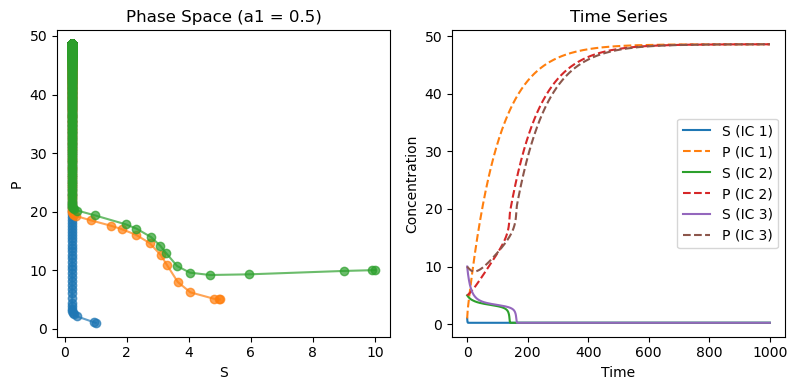

In [7]:
def verify_with_simulation(a1, initial_conditions, t_span=[0, 1000]):
    """Verify steady states by direct simulation"""
    
    plt.figure(figsize=(12, 4))
    
    for i, ic in enumerate(initial_conditions):
        # Simulate
        sol = solve_ivp(model, t_span, ic, args=(a1, b1, a2, b2, k_max, K_m, n, m), 
                       method='RK45', dense_output=True)
        
        # Plot trajectory
        plt.subplot(1, 3, 1)
        plt.plot(sol.y[0], sol.y[1], 'o-', alpha=0.7, label=f'IC {i+1}')
        plt.xlabel('S')
        plt.ylabel('P')
        plt.title(f'Phase Space (a1 = {a1})')
        
        # Plot time series
        plt.subplot(1, 3, 2)
        t_eval = np.linspace(t_span[0], t_span[1], 1000)
        sol_dense = sol.sol(t_eval)
        plt.plot(t_eval, sol_dense[0], label=f'S (IC {i+1})')
        plt.plot(t_eval, sol_dense[1], '--', label=f'P (IC {i+1})')
        plt.xlabel('Time')
        plt.ylabel('Concentration')
        plt.title('Time Series')
        plt.legend()
        
        # Final state
        final_state = sol.y[:, -1]
        print(f"IC {i+1}: Started at {ic}, ended at {final_state}")
    
    plt.tight_layout()
    plt.show()

# Test with some initial conditions
test_a1 = 0.5
test_ICs = [[1, 1], [5, 5], [10, 10]]
verify_with_simulation(test_a1, test_ICs)

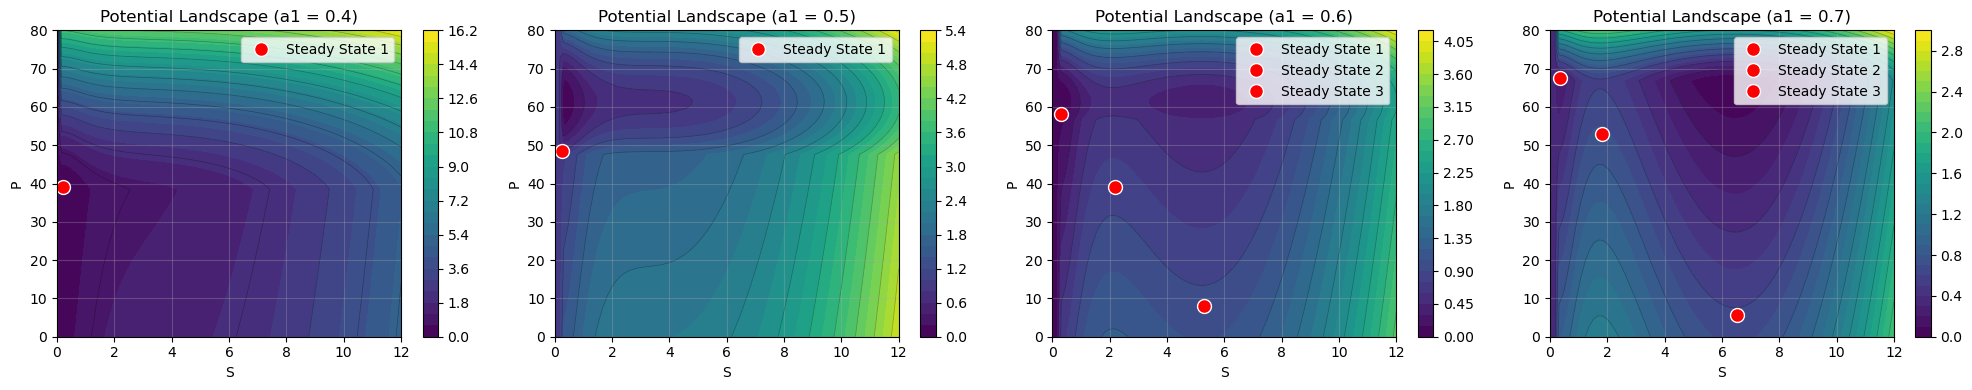

In [8]:
def plot_final_landscapes(landscapes):
    n_plots = len(landscapes)
    fig, axes = plt.subplots(1, n_plots, figsize=(5*n_plots, 4))
    
    if n_plots == 1:
        axes = [axes]
    
    for idx, (a1, (S_grid, P_grid, U, steady_states)) in enumerate(landscapes.items()):
        ax = axes[idx]
        
        # Plot potential landscape
        contour = ax.contourf(S_grid, P_grid, U, levels=30, cmap='viridis')
        plt.colorbar(contour, ax=ax)
        
        # Plot contour lines
        ax.contour(S_grid, P_grid, U, levels=15, colors='black', alpha=0.3, linewidths=0.5)
        
        # Mark steady states
        for i, state in enumerate(steady_states):
            ax.plot(state[0], state[1], 'ro', markersize=10, markeredgecolor='white', 
                   label=f'Steady State {i+1}')
        
        ax.set_xlabel('S')
        ax.set_ylabel('P')
        ax.set_title(f'Potential Landscape (a1 = {a1})')
        ax.legend()
        ax.grid(True, alpha=0.3)
        ax.set_xlim(0, 12)
        ax.set_ylim(0, 80)
    
    plt.tight_layout()
    plt.show()

# Plot the final results
plot_final_landscapes(landscapes)

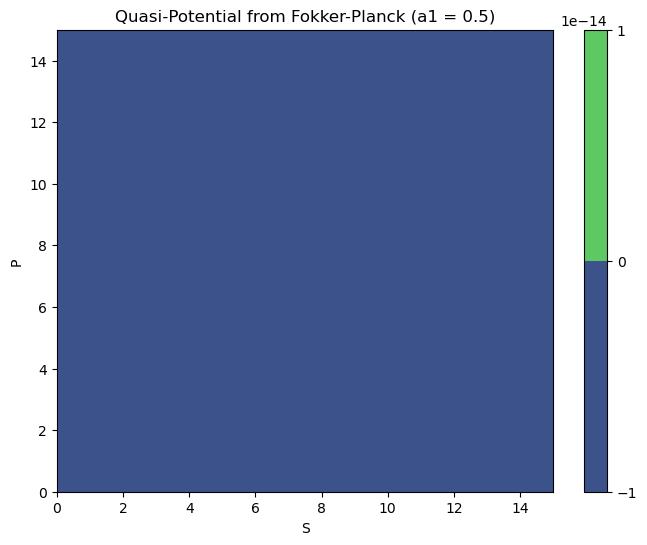

In [9]:
def solve_fokker_planck(a1, grid_size=100, D=0.1):
    """Solve stationary Fokker-Planck equation on a grid"""
    
    S = np.linspace(0, 15, grid_size)
    P = np.linspace(0, 15, grid_size)
    S_grid, P_grid = np.meshgrid(S, P)
    
    # Initialize probability distribution
    p = np.ones((grid_size, grid_size))
    p = p / np.sum(p)  # Normalize
    
    # Simple iterative solution (for demonstration - real implementation would be more sophisticated)
    for iteration in range(1000):
        p_new = p.copy()
        for i in range(1, grid_size-1):
            for j in range(1, grid_size-1):
                S_val, P_val = S[i], P[j]
                
                # Drift terms
                enzymatic_rate = (k_max * S_val**n) / (K_m**m + S_val**m)
                drift_S = a1 - b1 * S_val - enzymatic_rate
                drift_P = a2 - b2 * P_val + enzymatic_rate
                
                # Finite differences for Fokker-Planck operator
                # (This is a simplified implementation)
                p_new[i,j] = 0.25 * (p[i+1,j] + p[i-1,j] + p[i,j+1] + p[i,j-1])
        
        p_new = p_new / np.sum(p_new)  # Renormalize
        if np.max(np.abs(p_new - p)) < 1e-6:
            break
        p = p_new
    
    # Compute quasi-potential
    quasipotential = -np.log(p + 1e-10)
    quasipotential -= np.min(quasipotential)
    
    return S_grid, P_grid, quasipotential

# Test the Fokker-Planck approach
a1_test = 0.5
S_grid_fp, P_grid_fp, QP_fp = solve_fokker_planck(a1_test)

plt.figure(figsize=(8, 6))
contour = plt.contourf(S_grid_fp, P_grid_fp, QP_fp, levels=20, cmap='viridis')
plt.colorbar(contour)
plt.xlabel('S')
plt.ylabel('P')
plt.title(f'Quasi-Potential from Fokker-Planck (a1 = {a1_test})')
plt.show()